In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import re
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import ipywidgets as widgets
import nltk
from pandas_profiling import ProfileReport
nltk.download('stopwords')
from tqdm.notebook import tqdm, trange
from plotly.offline import init_notebook_mode
from ipywidgets import interact, interactive, fixed, interact_manual
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option('display.max_columns', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Humberto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
init_notebook_mode(connected = True)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
data = pd.read_csv('full_join_mayflower_top_10.csv')
data

C:\Users\Humberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (17,24,25) have mixed types.Specify dtype option on import or set low_memory=False.



,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price.x,minimum_nights.x,maximum_nights.x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date,available,price.y,adjusted_price,minimum_nights.y,maximum_nights.y
0,634424,https://www.airbnb.com/rooms/634424,20210705235432,2021-07-07,In the heart of San Gabriel Valley,"Private bedroom & bathroom available in 2 story house w/large window and natural light facing spacious backyard complete with gazebo and lush vegetation.Very close to Kaiser Permanente and perfect for the medical professional seeking proximity to workplace. Great for students who attend any of our local colleges including Cal Poly Pomona, Cal State LA, and Claremont Colleges. Also ideal for any traveler wishing to be in central location as close to downtown LA as it is to Pasadena or Long Beach.<br /><br /><b>The space</b><br />Room available: Bedroom. Separate private bath. Only shared when there are two simultaneous reservations. Clean, comfortable and chic in a contemporary single family home.<br /><br />Full use of kitchen, access to the lovely, whimsical garden. A great and peaceful place to read a book, work or simply relax. When in season, please help yourself to my pomegranates, lemons, figs, guavas and apples as well as any veggies or herbs growing in the garden.<br /><br />T","Quiet neighborhood. 5 min. drive to Metrolink station. 8-10 mile drive to beautiful waterfall hikes in the Sierra Madre Mountains. 25 min. from downtown LA, Pasadena, Santa Anita race track. Two blocks from Target shopping center. Near the 10 and 605 freeways. Local skiing and snowboarding in Mount Baldy and Big Bear both one and a half to 2 hours away. Perfect for guests traveling for business in the area. 35 miles east of Beverly Hills.",https://a0.muscache.com/pictures/miso/Hosting-634424/original/2a9037a5-2025-424e-96c7-f29c0b55cff5.jpeg,3159772,https://www.airbnb.com/users/show/3159772,Yolanda,2012-08-04,"Los Angeles, California, United States","My name is Yolanda. I'm a California native who enjoys traveling, art, good wine and food.\r\nI'm a friendly and honest person who takes pleasure in meeting new people. I know the city very well and I'm looking forward to welcoming you to my peaceful home.",within a few hours,100.0,50.0,False,https://a0.muscache.com/im/users/3159772/profile_pic/1344128669/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/3159772/profile_pic/1344128669/original.jpg?aki_policy=profile_x_medium,Baldwin Park,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",True,True,"Baldwin Park, California, United States",Baldwin Park,Other Cities,34.071100,-117.97292,Private room in house,Private room,2,NaN,1.5,1.0,1.0,"[""Oven"", ""Heating"", ""Stove"", ""Dishwasher"", ""Extra pillows and blankets"", ""Hair dryer"", ""Hot water"", ""Dishes

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241265 entries, 0 to 241264
Data columns (total 80 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            241265 non-null  int64  
 1   listing_url                                   241265 non-null  object 
 2   scrape_id                                     241265 non-null  int64  
 3   last_scraped                                  241265 non-null  object 
 4   name                                          241265 non-null  object 
 5   description                                   211700 non-null  object 
 6   neighborhood_overview                         129210 non-null  object 
 7   picture_url                                   241265 non-null  object 
 8   host_id                                       241265 non-null  int64  
 9   host_url                                      24

In [7]:
profile = ProfileReport(data)
profile.to_file(output_file="data.html")

Summarize dataset:   0%|          | 0/93 [00:00<?, ?it/s]

C:\Users\Humberto\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning:

overflow encountered in longlong_scalars



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
data = data.drop(columns=['listing_url', 'picture_url', 'host_url', 'host_picture_url',
                          'host_verifications', 'host_location', 'host_response_time', 
                          'host_neighbourhood', 'host_name', 'host_about', 'host_acceptance_rate', 
                          'host_total_listings_count', 'host_listings_count', 'host_is_superhost',
                          'neighbourhood_group_cleansed', 'neighbourhood', 'neighborhood_overview', 
                          'calendar_last_scraped', 'date', 'last_scraped', 'license', 'bathrooms', 
                          'calendar_updated', 'reviews_per_month', 'review_scores_value', 
                          'review_scores_location', 'review_scores_communication', 'review_scores_cleanliness', 
                          'review_scores_checkin', 'review_scores_accuracy', 'host_response_rate'])

In [9]:
data = data[data['adjusted_price'].notna()]

# Outliers handling

In [50]:
data = data[data['adjusted_price'] < 200]

# SPLITS

In [51]:
df, validation_df  = train_test_split(data,
                                test_size=0.25,
                                random_state = 101)

In [52]:
df_train, df_test  = train_test_split(df,
                                test_size=0.25,
                                random_state = 101)

# EDA

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117924 entries, 204766 to 59795
Data columns (total 49 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            117924 non-null  int64  
 1   scrape_id                                     117924 non-null  int64  
 2   name                                          117924 non-null  object 
 3   description                                   102284 non-null  object 
 4   host_id                                       117924 non-null  int64  
 5   host_since                                    117843 non-null  object 
 6   host_thumbnail_url                            117843 non-null  object 
 7   host_has_profile_pic                          117843 non-null  object 
 8   host_identity_verified                        117843 non-null  object 
 9   neighbourhood_cleansed                      

In [54]:
df_train.describe()

,id,scrape_id,host_id,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price.x,minimum_nights.x,maximum_nights.x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,price.y,adjusted_price,minimum_nights.y,maximum_nights.y
count,1.179240e+05,1.179240e+05,1.179240e+05,117924.000000,117924.000000,117924.000000,116281.000000,108253.000000,116929.00000,117924.000000,117924.000000,117924.000000,117924.000000,117924.000000,117924.000000,117924.000000,117924.000000,117924.000000,117924.000000,117924.000000,117924.000000,117924.000000,117924.000000,117924.00000,117924.000000,94700.000000,117924.000000,117924.000000,117924.000000,117924.000000,117924.000000,117924.000000,117924.000000,117924.000000
mean,3.298724e+07,2.021071e+13,1.669295e+08,34.113924,-118.028743,2.604500,1.244847,1.283429,1.47475,81.423417,10.265340,619.997507,10.180964,10.305697,792.940351,792.940351,10.265970,792.940351,7.172018,20.370688,36.878405,141.575014,21.282775,6.66620,0.744259,4.585457,3.777577,1.113378,2.471863,0.192336,82.380219,82.313261,10.267172,792.940351
std,1.323902e+07,2.037118e+01,1.185271e+08,0.028522,0.029999,1.577788,0.488868,0.614521,0.94424,43.811932,36.558872,515.814692,36.578244,36.577396,478.322853,478.322853,36.574741,478.322853,10.205957,22.046038,34.355341,133.863615,36.918545,13.12152,1.612040,0.766965,3.781099,2.043675,3.187204,0.908651,41.995139,41.905526,36.579568,478.322853
min,6.344240e+05,2.021071e+13,4.992440e+05,34.045550,-118.080860,1.000000,0.000000,1.000000,0.00000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,1.000000,1.000000
25%,2.184331e+07,2.021071e+13,6.161775e+07,34.096530,-118.052760,2.000000,1.000000,1.000000,1.00000,49.000000,1.000000,30.000000,1.000000,1.000000,320.000000,320.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,4.540000,1.000000,0.000000,0.000000,0.000000,50.000000,50.000000,1.000000,320.000000
50%,3.483937e+07,2.021071e+13,1.503653e+08,34.114410,-118.030280,2.000000,1.000000,1.000000,1.00000,69.000000,2.000000,1000.000000,2.000000,2.000000,1125.000000,1125.000000,2.000000,1125.000000,1.000000,12.000000,34.000000,96.000000,6.000000,0.00000,0.000000,4.800000,2.000000,0.000000,1.000000,0.000000,71.000000,71.000000,2.000000,1125.000000
75%,4.526896e+07,2.021071e+13,2.722021e+08,34.136270,-118.010510,3.000000,1.500000,1.000000,2.00000,100.000000,7.000000,1125.000000,7.000000,7.000000,1125.000000,1125.000000,7.000000,1125.000000,13.000000,38.000000,68.000000,286.000000,23.000000,7.00000,1.000000,5.000000,5.000000,1.000000,4.000000,0.000000,100.000000,100.000000,7.000000,1125.000000
max,5.082753e+07,2.021071e+13,4.082149e+08,34.173310,-117.925880,11.000000,4.000000,4.000000,7.00000,397.000000,730.000000,1125.000000,730.000000,730.000000,1125.000000,1125.000000,730.000000,1125.000000,30.000000,60.000000,90.000000,365.000000,248.000000,93.00000,12.000000,5.000000,38.000000,15.000000,38.000000,6.000000,234.000000,199.000000,730.000000,1125.000000


C:\Users\Humberto\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



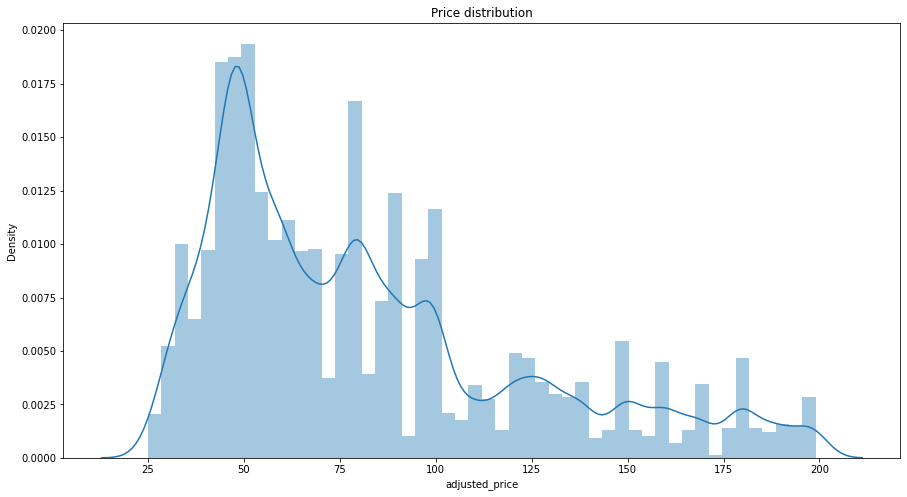

C:\Users\Humberto\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



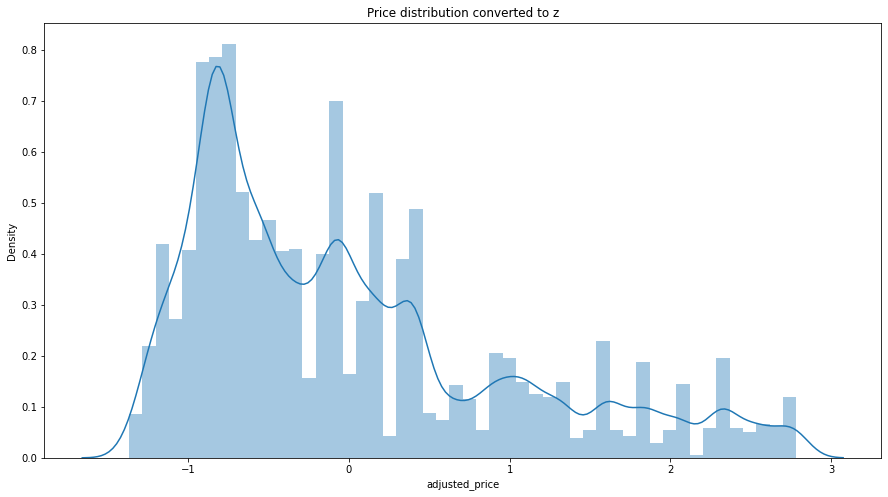

In [55]:
plt.figure(figsize = (15, 8))
sns.distplot(df_train['adjusted_price'])
plt.title('Price distribution')
plt.show()

plt.figure(figsize = (15, 8))
sns.distplot((df_train['adjusted_price']-np.mean(df_train['adjusted_price'])) / np.std(df_train['adjusted_price']))
plt.title('Price distribution converted to z')
plt.show()

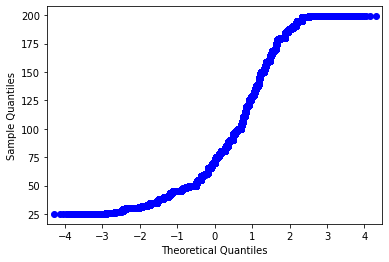

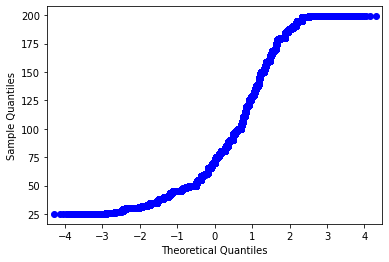

In [56]:
#qqplot
qqplot(df_train['adjusted_price'])

# Looks like price distribution is roughly Gaussian

In [57]:
df_train[df_train['bedrooms'] == 0].head()

,id,scrape_id,name,description,host_id,host_since,host_thumbnail_url,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price.x,minimum_nights.x,maximum_nights.x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,available,price.y,adjusted_price,minimum_nights.y,maximum_nights.y


<AxesSubplot:>

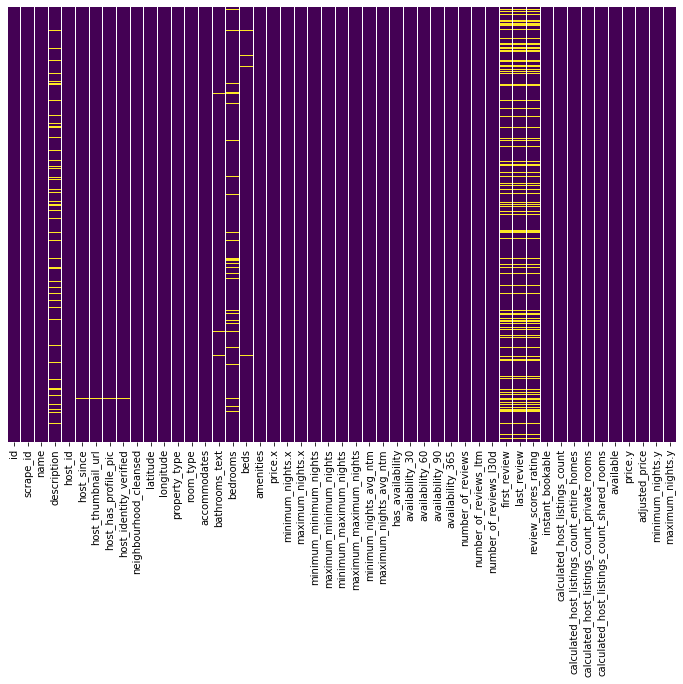

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Columns with a lot of missing data:

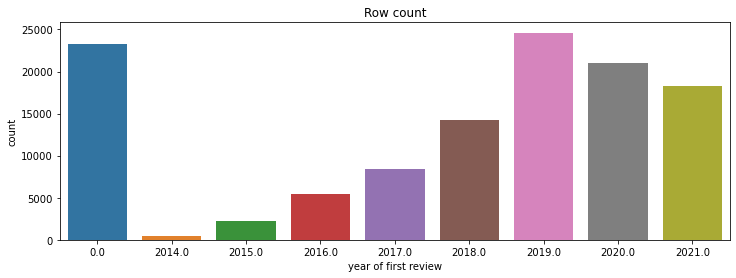

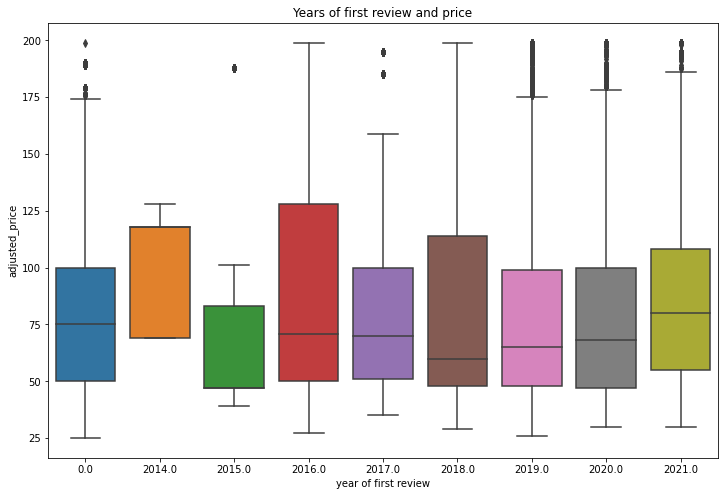

In [59]:
years_of_first_review = pd.DataFrame({
    'year of first review':pd.to_datetime(df_train['first_review'], format='%Y-%m-%d', errors='coerce').dt.year.fillna(0),
    'adjusted_price': df_train['adjusted_price']
})
plt.figure(figsize=(12,4))

sns.countplot(x="year of first review", data=years_of_first_review)
plt.title('Row count')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(data=years_of_first_review,orient='v', x = 'year of first review', y = 'adjusted_price')
plt.title('Years of first review and price')
plt.show()

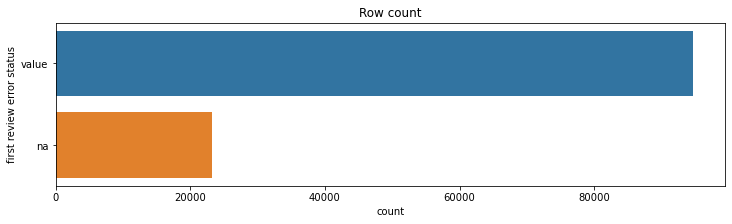

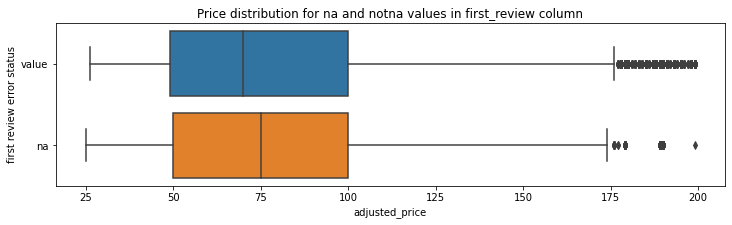

In [60]:
na_or_not = lambda x: 'na' if x else 'value'

first_review_error_status= pd.DataFrame({
    'first review error status':df_train['first_review'].isna().apply(na_or_not),
    'adjusted_price': df_train['adjusted_price']
})

plt.figure(figsize=(12,3))
sns.countplot(y='first review error status', data=first_review_error_status, orient='h')
plt.title('Row count')
plt.show()

plt.figure(figsize=(12,3))
sns.boxplot(data=first_review_error_status,orient='h', y = 'first review error status', x = 'adjusted_price')
plt.title('Price distribution for na and notna values in first_review column')
plt.show()

<Figure size 720x360 with 0 Axes>

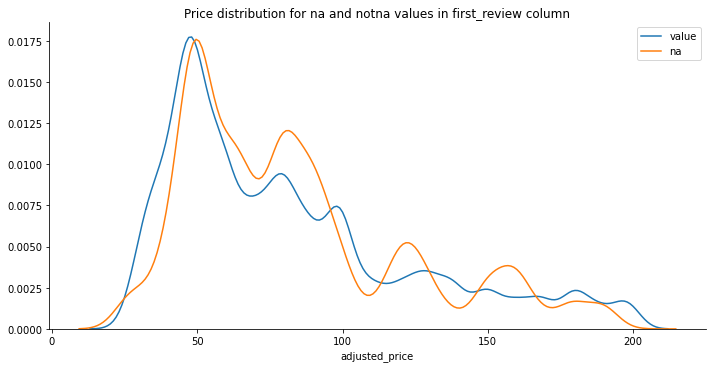

In [61]:
plt.figure(figsize=(10,5))
g = sns.FacetGrid(first_review_error_status, hue="first review error status", height = 5, aspect = 2)
g.map(sns.kdeplot, "adjusted_price")
plt.legend()
plt.title('Price distribution for na and notna values in first_review column')
plt.show()

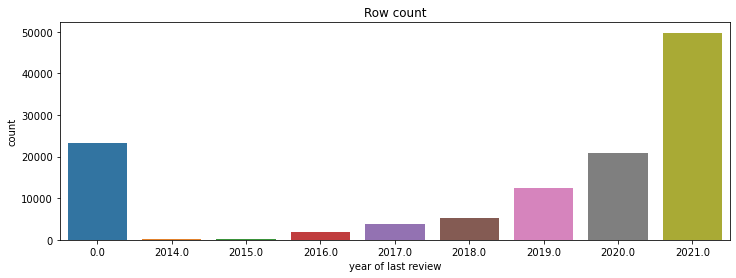

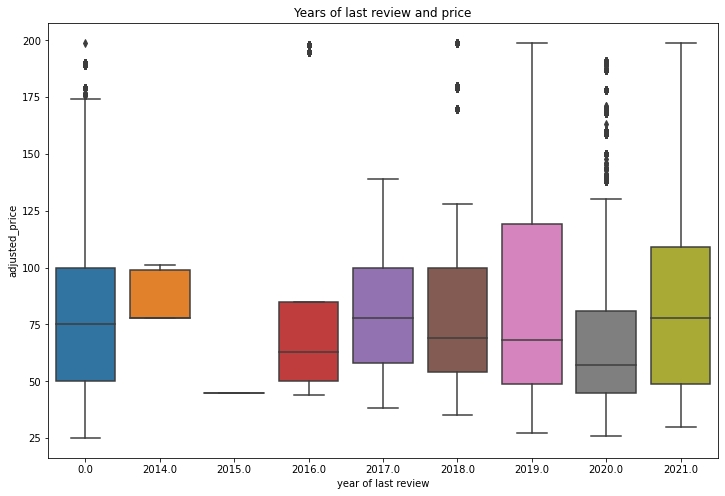

In [62]:
years_of_last_review = pd.DataFrame({
    'year of last review':pd.to_datetime(df_train['last_review'], format='%Y-%m-%d', errors='coerce').dt.year.fillna(0),
    'adjusted_price': df_train['adjusted_price']
})

plt.figure(figsize=(12,4))
sns.countplot(x="year of last review", data=years_of_last_review)
plt.title('Row count')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(data=years_of_last_review,orient='v', x = 'year of last review', y = 'adjusted_price')
plt.title('Years of last review and price')
plt.show()

In [63]:
popular_property_types = list(df_train['property_type'].value_counts()[df_train['property_type'].value_counts() > 50].index)
popular_property_types

['Private room in house',
 'Entire house',
 'Private room in apartment',
 'Private room in townhouse',
 'Entire apartment',
 'Entire guesthouse',
 'Private room in villa',
 'Private room in bungalow',
 'Room in boutique hotel',
 'Entire guest suite',
 'Private room in condominium',
 'Entire condominium',
 'Private room in guest suite',
 'Entire bungalow',
 'Entire townhouse',
 'Private room in guesthouse',
 'Shared room in house',
 'Entire villa',
 'Private room in bed and breakfast',
 'Private room in castle',
 'Private room in tent',
 'Camper/RV',
 'Shared room in townhouse',
 'Entire cottage',
 'Shared room in apartment',
 'Room in hotel',
 'Private room in tiny house',
 'Shared room',
 'Tiny house',
 'Shared room in condominium',
 'Private room in cottage',
 'Entire place',
 'Shared room in guesthouse',
 'Shared room in tent',
 'Private room in hut',
 'Barn']

In [64]:
df_train['property_type'].value_counts()

Private room in house                38965
Entire house                         11741
Private room in apartment             7963
Private room in townhouse             7730
Entire apartment                      7603
Entire guesthouse                     4968
Private room in villa                 4949
Private room in bungalow              4123
Room in boutique hotel                3937
Entire guest suite                    3859
Private room in condominium           3065
Entire condominium                    2277
Private room in guest suite           2228
Entire bungalow                       1952
Entire townhouse                      1746
Private room in guesthouse            1654
Shared room in house                  1595
Entire villa                          1475
Private room in bed and breakfast     1101
Private room in castle                 637
Private room in tent                   624
Camper/RV                              424
Shared room in townhouse               421
Entire cott

In [65]:
df_train['room_type'].value_counts()

Private room       77805
Entire home/apt    37064
Shared room         3055
Name: room_type, dtype: int64

In [66]:
df_train['neighbourhood_cleansed'].value_counts()

Arcadia              30390
Temple City          23870
El Monte             20414
Monrovia             19668
Baldwin Park          6300
Mayflower Village     5824
Duarte                4373
Sierra Madre          3591
North El Monte        2267
Irwindale             1227
Name: neighbourhood_cleansed, dtype: int64

In [67]:
df_train['review_scores_rating'].value_counts()

5.00    25428
4.50     3811
4.00     3736
4.67     3602
4.86     2448
        ...  
2.67      197
4.48      194
3.77      193
4.40      193
4.37       63
Name: review_scores_rating, Length: 80, dtype: int64

In [68]:
df_train[df_train['bathrooms_text'].isna()]

,id,scrape_id,name,description,host_id,host_since,host_thumbnail_url,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price.x,minimum_nights.x,maximum_nights.x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,available,price.y,adjusted_price,minimum_nights.y,maximum_nights.y
210327,48336328,20210705235432,Small Farm Stay,"Small Farm Stay made for peaceful family gatherings now available for guests. Includes two grills, a Mexican style oven and an area for a fire pit. Animals are off limits.<br /><br /><b>The space</b><br />5 stables but only 1 horse <br />Large open stable used for running horses can be used for bonfire<br />2 grills for meals.<br />1 Mexican style oven<br /><br /><b>Guest access</b><br />All property on listing is accessible except for locked doors.<br /><br /><b>Other things to note</b><br />TV requests available for 60$ extra charge",356716741,2020-07-16,https://a0.muscache.com/im/pictures/user/dc92e281-26c8-4968-b545-f6f2dcf14b85.jpg?aki_policy=profile_small,True,True,El Monte,34.09455,-118.00145,Barn,Entire home/apt,9,NaN,NaN,0.0,"[""Essentials"", ""Hot water"", ""Kitchen"", ""Free street parking"", ""Free parking on premises""]",150,1,1,1,1,1,1,1.0,1,True,0,0,0,0,0,0,0,NaN,NaN,NaN,False,1,1,0,0,False,150.0,150.0,1,1
159405,41987597,20210705235432,B’s Place,Bed to rest up with access to kitchen & bathroom.,332463028,2020-02-01,https://a0.muscache.com/im/pictures/user/755b016f-9069-4641-a4d1-dfe8e9384aee.jpg?aki_policy=profile_small,True,True,Baldwin Park,34.06391,-117.99210,Private room in house,Private room,1,NaN,1.0,NaN,"[""First aid kit"", ""Wifi"", ""Security cameras on property"", ""Lock on bedroom door"", ""Carbon monoxide alarm"", ""Smoke alarm"", ""Kitchen"", ""TV""]",115,1,3,1,1,1125,1125,1.0,1125,True,30,60,90,90,1,0,0,2020-02-09,2020-02-09,5.0,False,1,0,1,0,False,115.0,115.0,1,1125
210534,48336328,20210705235432,Small Farm Stay,"Small Farm Stay made for peaceful family gatherings now available for guests. Includes two grills, a Mexican style oven and an area for a fire pit. Animals are off limits.<br /><br /><b>The space</b><br />5 stables but only 1 horse <br />Large open stable used for running horses can be used for bonfire<br />2 grills for meals.<br />1 Mexican style oven<br /><br /><b>Guest access</b><br />All property on listing is accessible except for locked doors.<br /><br /><b>Other things to note</b><br />TV requests available for 60$ extra charge",356716741,2020-07-16,https://a0.muscache.com/im/pictures/user/dc92e281-26c8-4968-b545-f6f2dcf14b85.jpg?aki_policy=profile_small,True,True,El Monte,34.09455,-118.00145,Barn,Entire home/apt,9,NaN,NaN,0.0,"[""Essentials"", ""Hot water"", ""Kitchen"", ""Free street parking"", ""Free parking on premises""]",150,1,1,1,1,1,1,1.0,1,True,0,0,0,0,0,0,0,NaN,NaN,NaN,False,1,1,0,0,False,150.0,150.0,1,1
166990,43282612,20210705235432,阿卡迪亚套房,"房子均位于“华人的比佛利山庄”亚凯迪亚，核心商圈的黄金位置，不需要租车。整个附近背靠山，附近挨着海。小区周围很多孔雀松鼠等珍贵动物。<br />房子位于亚凯迪亚核心商圈，步行10分钟之内有5个超市，多个商场，各种餐厅丶银行等业态，步行15分钟到著名的Arcadia mall，里面有梅西Macy""s百货、海底捞、眉州东坡酒楼、鼎泰堂等几百家店铺。",344596971,2020-04-25,https://a0.muscache.com/im/pictures/user/26d6c1fa-22ba-4677-ab68-6e06928a0eaa.jpg?aki_policy=profile_small,True,True,Arcadia,34.12540,-118.06213,Private room in villa,Private room,2,NaN,NaN,1.0,"[""Washer"", ""Wifi"", ""Hot water"", ""Kitchen"", ""Dryer"", ""Heating"", ""Hot tub"", ""Long term stays allowed"", ""Free parking on premises"", ""Air conditioning"

In [69]:
df_train['bathrooms_text'].value_counts()

1.0    80461
1.5    19175
2.0    10506
2.5     2678
3.0     1393
0.0     1051
3.5      851
4.0      166
Name: bathrooms_text, dtype: int64

In [70]:
df_train['host_has_profile_pic'].value_counts()

True     117622
False       221
Name: host_has_profile_pic, dtype: int64

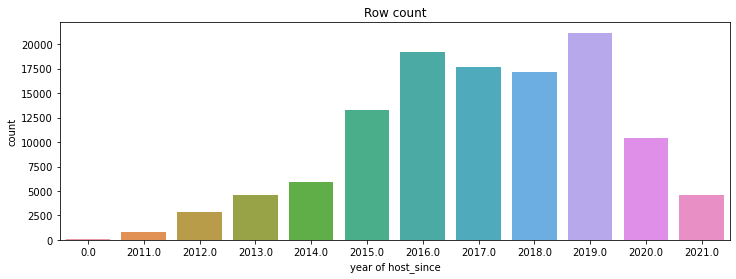

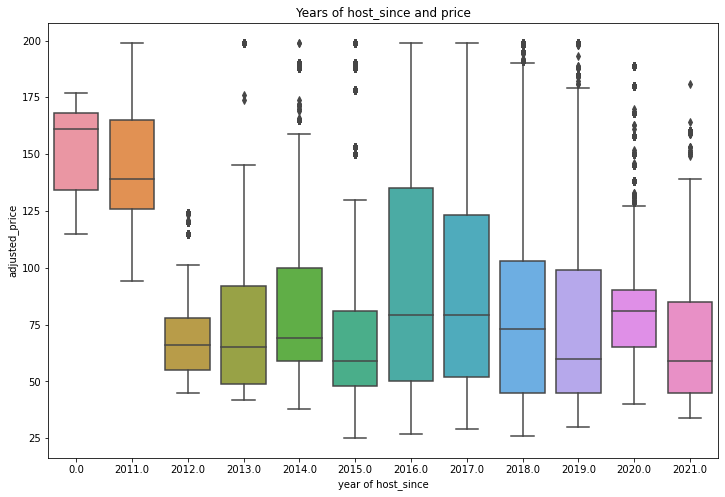

In [71]:
years_of_host_since = pd.DataFrame({
    'year of host_since':pd.to_datetime(df_train['host_since'], format='%Y-%m-%d', errors='coerce').dt.year.fillna(0),
    'adjusted_price': df_train['adjusted_price']
})

plt.figure(figsize=(12,4))
sns.countplot(x="year of host_since", data=years_of_host_since)
plt.title('Row count')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(data=years_of_host_since,orient='v', x = 'year of host_since', y = 'adjusted_price')
plt.title('Years of host_since and price')
plt.show()

<AxesSubplot:>

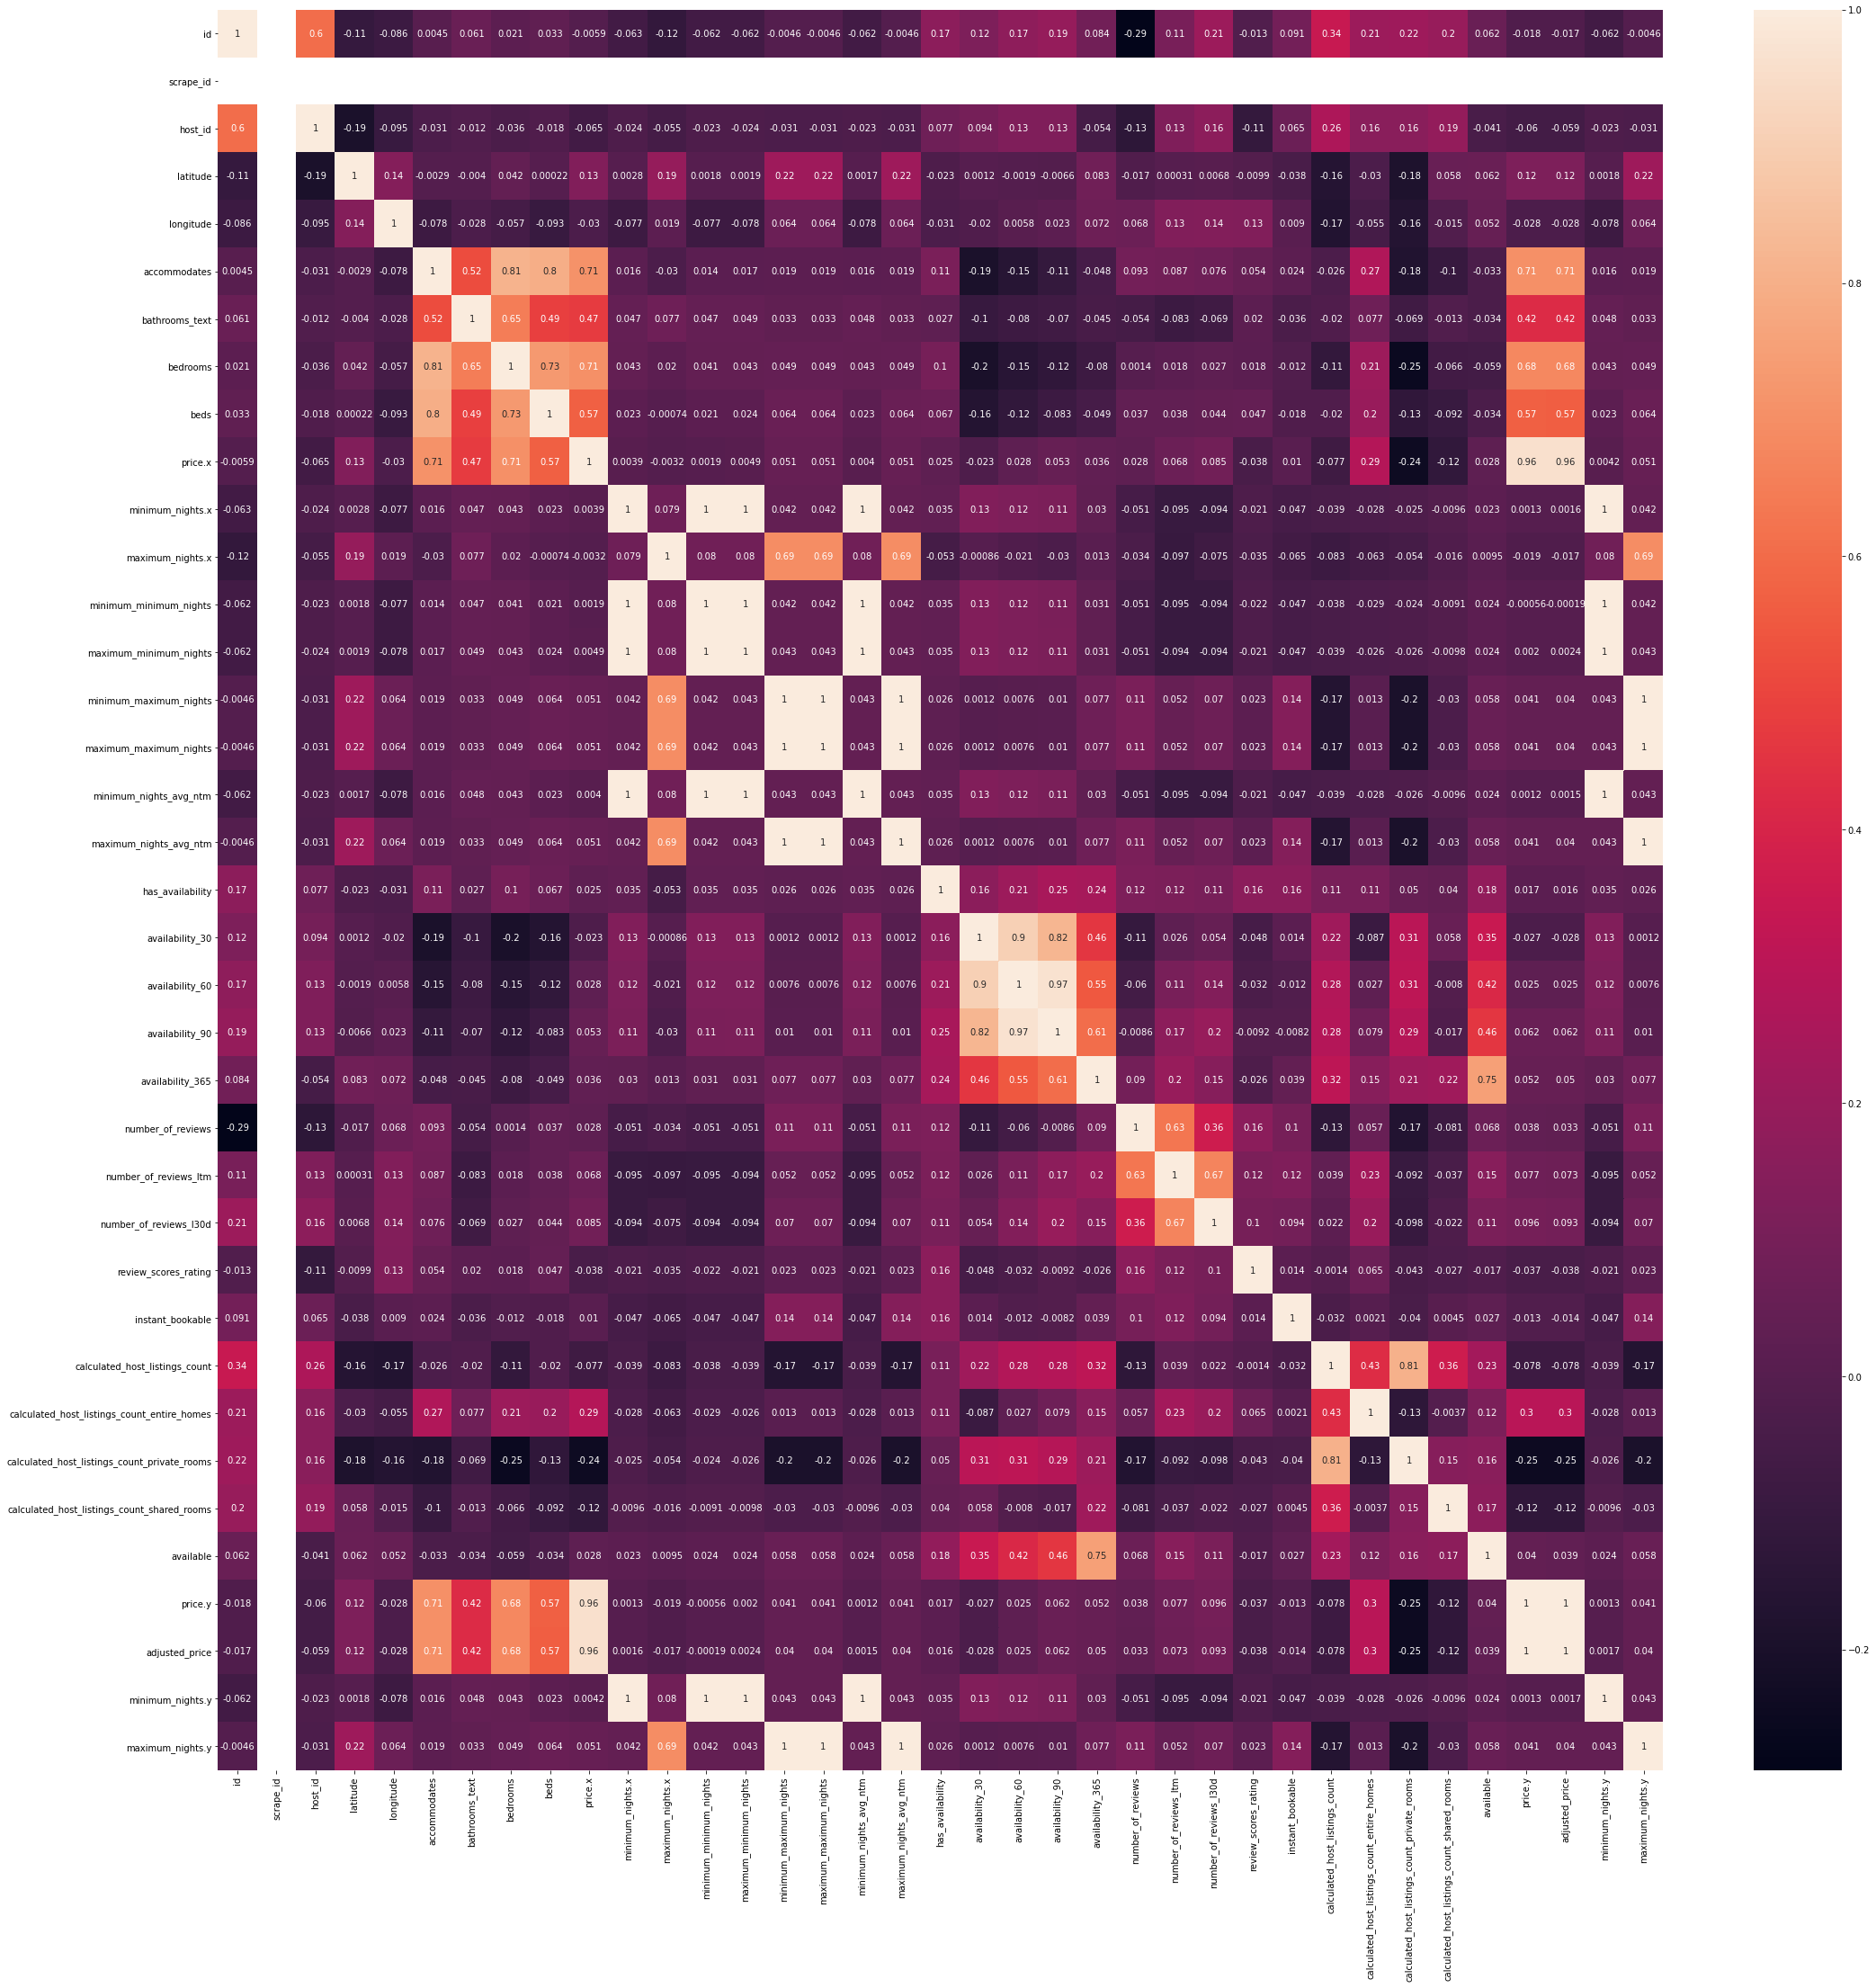

In [74]:
plt.figure(figsize = (36,36))
sns.heatmap(df_train.corr(),annot=True)

In [75]:
profile = ProfileReport(df_train)
profile.to_file(output_file="df_train.html")

Summarize dataset:   0%|          | 0/63 [00:00<?, ?it/s]

C:\Users\Humberto\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning:

overflow encountered in longlong_scalars



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data preparation

In [76]:
amenities_set = set()
for amenitie in df_train['amenities']:
    amenitie_set = set(re.sub(r'(\"|\{|\})', '', amenitie).split(','))
    for piece in amenitie_set:
        if "translation missing" not in piece and piece:
            amenities_set.add(piece.strip())
            
amenities_set

{'24\\ TV with Amazon Prime Video',
 '30\\ TV with Roku',
 '32\\ TV with Amazon Prime Video',
 '42\\ HDTV with Amazon Prime Video',
 '46\\ TV with Amazon Prime Video',
 '48\\ HDTV with Chromecast',
 '48\\ TV',
 '50\\ HDTV with Netflix',
 '50\\ TV',
 '55\\ HDTV',
 '55\\ HDTV with Netflix',
 '55\\ HDTV with Roku',
 '55\\ HDTV with premium cable',
 '60\\ TV',
 '60\\ TV with premium cable',
 'Air conditioning',
 'Air conditioning]',
 'Alexa  Bluetooth sound system',
 'Amazon Prime Video',
 'Apple TV',
 'BBQ grill',
 'Baby bath',
 'Baby safety gates',
 'Babysitter recommendations',
 'Backyard',
 'Baking sheet',
 'Baking sheet]',
 'Barbecue utensils',
 'Bathroom essentials',
 'Bathtub',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Bikes',
 'Board games',
 'Body soap',
 'Bose mobile speaker  Bluetooth sound system',
 'Bread maker',
 'Breakfast',
 'Building staff',
 'Cable TV',
 'Carbon monoxide alarm',
 'Ceiling fan',
 'Central air conditioning',
 'Centr

In [ ]:
profile = ProfileReport(df_train)
profile.to_file(output_file="df_train-amenities.html")

In [77]:
def dummification(df):
    dummy_df = pd.DataFrame()
    object_cols = ['property_type', 'room_type', 'neighbourhood_cleansed', 'first_review']
    for col in object_cols:
        dummy_df = pd.concat([dummy_df, create_dummy(col, df)], axis = 1)
    
    return pd.concat([df.drop(columns = object_cols), dummy_df], axis = 1)
        
def create_dummy(col, df):
    df_dummy = pd.get_dummies(df[col], drop_first = True)
    df_dummy.columns = ['dum: ' + col + ': ' + name for name in df_dummy.columns]
    return df_dummy

def dum_col_filling(main_col_val, dum_col_name, main_col_name):
    if dum_col_name.replace(main_col_name + ': ', '') in main_col_val:
        return 1
    else:
        return 0

def set_to_dummies(df, column_name):
    all_values_of_sets = amenities_set
    dummy_columns_name = [column_name + ': ' + dum_col for dum_col in all_values_of_sets if dum_col]
    dummy_df = pd.DataFrame(0, index=df.index, columns=dummy_columns_name)
    df = pd.concat([dummy_df, df], axis = 1)
    for dum_col_name in dummy_columns_name:
        for i in df.index:
            df[dum_col_name][i] = dum_col_filling(df[column_name][i], dum_col_name, column_name)
    return df

def property_type_proc(val):
    if val in popular_property_types:
        return val
    else:
        return 'other'
      
def first_review_poc(val):
    if pd.isna(val):
        return 'no data'
    elif datetime.strptime(val,'%Y-%m-%d').year < 2014:
        return ' < 2014'
    else:
        return str(int(datetime.strptime(val,'%Y-%m-%d').year))
    
def unknown_filling(val):
    if pd.isna(val):
        return 'no data'
    else:
        return val

def host_since_proc(val):
    if pd.isna(val):
        return 2008
    else:
        return int(datetime.strptime(val,'%Y-%m-%d').year)

def true_to_1(val):
    if val in {'True', True, 't'}:
        return 1
    else:
        return 0
    
def processing(df):
    df = df.copy()
    df['property_type'] = df['property_type'].apply(property_type_proc)
    df['first_review'] = df['first_review'].apply(first_review_poc)
    df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].apply(unknown_filling)
    df['review_scores_rating'] = df['review_scores_rating'].fillna(0)
    df['bathrooms_text'] = df['bathrooms_text'].fillna(-1)
    df['bedrooms'] = df['bedrooms'].fillna(-1)
    df['beds'] = df['beds'].fillna(-1)
    df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna('f')
    df['host_identity_verified'] = df['host_identity_verified'].fillna('f')
    df['host_since'] = df['host_since'].apply(host_since_proc)
    df['host_has_profile_pic'] = df['host_has_profile_pic'].apply(true_to_1)
    df['host_identity_verified'] = df['host_identity_verified'].apply(true_to_1)
    df['instant_bookable'] = df['instant_bookable'].apply(true_to_1)
    df = set_to_dummies(df, 'amenities')
    df = dummification(df)
    df.drop(['amenities', 'host_thumbnail_url', 'description', 'id', 'last_review', 'name'], axis = 1, inplace = True)
    return df.sort_index(ascending=False, axis=1)

#df_d = processing(df.sample(frac=0.01,random_state=101))
df_d = processing(df_train)
df_d

<ipython-input-77-920826ac3d24>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,scrape_id,review_scores_rating,price.y,price.x,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews,minimum_nights_avg_ntm,minimum_nights.y,minimum_nights.x,minimum_minimum_nights,minimum_maximum_nights,maximum_nights_avg_ntm,maximum_nights.y,maximum_nights.x,maximum_minimum_nights,maximum_maximum_nights,longitude,latitude,instant_bookable,host_since,host_identity_verified,host_id,host_has_profile_pic,has_availability,dum: room_type: Shared room,dum: room_type: Private room,dum: property_type: Tiny house,dum: property_type: Shared room in townhouse,dum: property_type: Shared room in tent,dum: property_type: Shared room in house,dum: property_type: Shared room in guesthouse,dum: property_type: Shared room in condominium,dum: property_type: Shared room in apartment,dum: property_type: Shared room,dum: property_type: Room in hotel,dum: property_type: Room in boutique hotel,dum: property_type: Private room in villa,dum: property_type: Private room in townhouse,dum: property_type: Private room in tiny house,dum: property_type: Private room in tent,dum: property_type: Private room in hut,dum: property_type: Private room in house,dum: property_type: Private room in guesthouse,dum: property_type: Private room in guest suite,dum: property_type: Private room in cottage,dum: property_type: Private room in condominium,dum: property_type: Private room in castle,dum: property_type: Private room in bungalow,dum: property_type: Private room in bed and breakfast,dum: property_type: Private room in apartment,dum: property_type: Entire villa,dum: property_type: Entire townhouse,dum: property_type: Entire place,dum: property_type: Entire house,dum: property_type: Entire guesthouse,dum: property_type: Entire guest suite,dum: property_type: Entire cottage,dum: property_type: Entire condominium,dum: property_type: Entire bungalow,dum: property_type: Entire apartment,dum: property_type: Camper/RV,dum: neighbourhood_cleansed: Temple City,dum: neighbourhood_cleansed: Sierra Madre,dum: neighbourhood_cleansed: North El Monte,dum: neighbourhood_cleansed: Monrovia,dum: neighbourhood_cleansed: Mayflower Village,dum: neighbourhood_cleansed: Irwindale,dum: neighbourhood_cleansed: El Monte,dum: neighbourhood_cleansed: Duarte,dum: neighbourhood_cleansed: Baldwin Park,dum: first_review: no data,dum: first_review: 2021,dum: first_review: 2020,dum: first_review: 2019,dum: first_review: 2018,dum: first_review: 2017,dum: first_review: 2016,dum: first_review: 2015,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_private_rooms,calculated_host_listings_count_entire_homes,calculated_host_listings_count,beds,bedrooms,bathrooms_text,available,availability_90,availability_60,availability_365,availability_30,amenities: whirlpool refrigerator,amenities: walk-in closet,amenities: toaster oven stainless steel oven,amenities: table,amenities: standard conditioner,amenities: standard cable,amenities: premium cable,amenities: office chair,amenities: neutrogena body soap,amenities: mini fridge refrigerator,amenities: dresser,amenities: desk,amenities: closet,amenities: and wardrobe,amenities: and walk-in closet,amenities: and table,amenities: and office chair,amenities: and dresser,amenities: and desk,amenities: [standard body soap,amenities: [Wifi,amenities: [Washer,amenities: [Toaster,amenities: [Shared pool,amenities: [Shared garden or backyard,amenities: [Security cameras on property,amenities: [Private entrance],amenities: [Pool,amenities: [Pack \u2019n Play/travel crib,amenities: [Oven,amenities: [Microwave,amenities: [Long term stays allowed],amenities: [Long term stays allowed,amenities: [Kitchen,amenities: [Keypad,amenities: [Heating,amenities: [Hair dryer,amenities: [First aid kit,amenities: [Extra pillows and blankets,amenities: [Essentials,amenities: [Drying rack for clothing,amenities: [Dining table,amenities: [Dedicated workspace: office chair,amenities: [Clothing storage: wardrobe,amenities: [Clothing storage: dresser,amenities: 

In [78]:
df_d[df_d.isnull().any(axis=1)]

,scrape_id,review_scores_rating,price.y,price.x,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews,minimum_nights_avg_ntm,minimum_nights.y,minimum_nights.x,minimum_minimum_nights,minimum_maximum_nights,maximum_nights_avg_ntm,maximum_nights.y,maximum_nights.x,maximum_minimum_nights,maximum_maximum_nights,longitude,latitude,instant_bookable,host_since,host_identity_verified,host_id,host_has_profile_pic,has_availability,dum: room_type: Shared room,dum: room_type: Private room,dum: property_type: Tiny house,dum: property_type: Shared room in townhouse,dum: property_type: Shared room in tent,dum: property_type: Shared room in house,dum: property_type: Shared room in guesthouse,dum: property_type: Shared room in condominium,dum: property_type: Shared room in apartment,dum: property_type: Shared room,dum: property_type: Room in hotel,dum: property_type: Room in boutique hotel,dum: property_type: Private room in villa,dum: property_type: Private room in townhouse,dum: property_type: Private room in tiny house,dum: property_type: Private room in tent,dum: property_type: Private room in hut,dum: property_type: Private room in house,dum: property_type: Private room in guesthouse,dum: property_type: Private room in guest suite,dum: property_type: Private room in cottage,dum: property_type: Private room in condominium,dum: property_type: Private room in castle,dum: property_type: Private room in bungalow,dum: property_type: Private room in bed and breakfast,dum: property_type: Private room in apartment,dum: property_type: Entire villa,dum: property_type: Entire townhouse,dum: property_type: Entire place,dum: property_type: Entire house,dum: property_type: Entire guesthouse,dum: property_type: Entire guest suite,dum: property_type: Entire cottage,dum: property_type: Entire condominium,dum: property_type: Entire bungalow,dum: property_type: Entire apartment,dum: property_type: Camper/RV,dum: neighbourhood_cleansed: Temple City,dum: neighbourhood_cleansed: Sierra Madre,dum: neighbourhood_cleansed: North El Monte,dum: neighbourhood_cleansed: Monrovia,dum: neighbourhood_cleansed: Mayflower Village,dum: neighbourhood_cleansed: Irwindale,dum: neighbourhood_cleansed: El Monte,dum: neighbourhood_cleansed: Duarte,dum: neighbourhood_cleansed: Baldwin Park,dum: first_review: no data,dum: first_review: 2021,dum: first_review: 2020,dum: first_review: 2019,dum: first_review: 2018,dum: first_review: 2017,dum: first_review: 2016,dum: first_review: 2015,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_private_rooms,calculated_host_listings_count_entire_homes,calculated_host_listings_count,beds,bedrooms,bathrooms_text,available,availability_90,availability_60,availability_365,availability_30,amenities: whirlpool refrigerator,amenities: walk-in closet,amenities: toaster oven stainless steel oven,amenities: table,amenities: standard conditioner,amenities: standard cable,amenities: premium cable,amenities: office chair,amenities: neutrogena body soap,amenities: mini fridge refrigerator,amenities: dresser,amenities: desk,amenities: closet,amenities: and wardrobe,amenities: and walk-in closet,amenities: and table,amenities: and office chair,amenities: and dresser,amenities: and desk,amenities: [standard body soap,amenities: [Wifi,amenities: [Washer,amenities: [Toaster,amenities: [Shared pool,amenities: [Shared garden or backyard,amenities: [Security cameras on property,amenities: [Private entrance],amenities: [Pool,amenities: [Pack \u2019n Play/travel crib,amenities: [Oven,amenities: [Microwave,amenities: [Long term stays allowed],amenities: [Long term stays allowed,amenities: [Kitchen,amenities: [Keypad,amenities: [Heating,amenities: [Hair dryer,amenities: [First aid kit,amenities: [Extra pillows and blankets,amenities: [Essentials,amenities: [Drying rack for clothing,amenities: [Dining table,amenities: [Dedicated workspace: office chair,amenities: [Clothing storage: wardrobe,amenities: [Clothing storage: dresser,amenities: 

In [80]:
sns.pairplot(df_d, hue = 'room_type')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000249855DD0D0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
profile = ProfileReport(df_d)
profile.to_file(output_file="df_d.html")

# Modelling

In [81]:
#adding missing columns to test \ validation sets and deleting unnecessary
columns_needed = set(df_d.columns)
def columns_standardization(df):
    df = df.copy()
    for col in columns_needed:
        if col not in set(df.columns):
            df.insert(loc = len(df.columns), column = col, value = 0, allow_duplicates=False)
    
    for col in set(df.columns):
        if col not in columns_needed:
            df.drop(columns = col, axis = 1, inplace = True)
    
    return df.sort_index(ascending=False, axis=1)

In [82]:
test = columns_standardization(processing(df_test))
test

<ipython-input-77-920826ac3d24>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,scrape_id,review_scores_rating,price.y,price.x,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews,minimum_nights_avg_ntm,minimum_nights.y,minimum_nights.x,minimum_minimum_nights,minimum_maximum_nights,maximum_nights_avg_ntm,maximum_nights.y,maximum_nights.x,maximum_minimum_nights,maximum_maximum_nights,longitude,latitude,instant_bookable,host_since,host_identity_verified,host_id,host_has_profile_pic,has_availability,dum: room_type: Shared room,dum: room_type: Private room,dum: property_type: Tiny house,dum: property_type: Shared room in townhouse,dum: property_type: Shared room in tent,dum: property_type: Shared room in house,dum: property_type: Shared room in guesthouse,dum: property_type: Shared room in condominium,dum: property_type: Shared room in apartment,dum: property_type: Shared room,dum: property_type: Room in hotel,dum: property_type: Room in boutique hotel,dum: property_type: Private room in villa,dum: property_type: Private room in townhouse,dum: property_type: Private room in tiny house,dum: property_type: Private room in tent,dum: property_type: Private room in hut,dum: property_type: Private room in house,dum: property_type: Private room in guesthouse,dum: property_type: Private room in guest suite,dum: property_type: Private room in cottage,dum: property_type: Private room in condominium,dum: property_type: Private room in castle,dum: property_type: Private room in bungalow,dum: property_type: Private room in bed and breakfast,dum: property_type: Private room in apartment,dum: property_type: Entire villa,dum: property_type: Entire townhouse,dum: property_type: Entire place,dum: property_type: Entire house,dum: property_type: Entire guesthouse,dum: property_type: Entire guest suite,dum: property_type: Entire cottage,dum: property_type: Entire condominium,dum: property_type: Entire bungalow,dum: property_type: Entire apartment,dum: property_type: Camper/RV,dum: neighbourhood_cleansed: Temple City,dum: neighbourhood_cleansed: Sierra Madre,dum: neighbourhood_cleansed: North El Monte,dum: neighbourhood_cleansed: Monrovia,dum: neighbourhood_cleansed: Mayflower Village,dum: neighbourhood_cleansed: Irwindale,dum: neighbourhood_cleansed: El Monte,dum: neighbourhood_cleansed: Duarte,dum: neighbourhood_cleansed: Baldwin Park,dum: first_review: no data,dum: first_review: 2021,dum: first_review: 2020,dum: first_review: 2019,dum: first_review: 2018,dum: first_review: 2017,dum: first_review: 2016,dum: first_review: 2015,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_private_rooms,calculated_host_listings_count_entire_homes,calculated_host_listings_count,beds,bedrooms,bathrooms_text,available,availability_90,availability_60,availability_365,availability_30,amenities: whirlpool refrigerator,amenities: walk-in closet,amenities: toaster oven stainless steel oven,amenities: table,amenities: standard conditioner,amenities: standard cable,amenities: premium cable,amenities: office chair,amenities: neutrogena body soap,amenities: mini fridge refrigerator,amenities: dresser,amenities: desk,amenities: closet,amenities: and wardrobe,amenities: and walk-in closet,amenities: and table,amenities: and office chair,amenities: and dresser,amenities: and desk,amenities: [standard body soap,amenities: [Wifi,amenities: [Washer,amenities: [Toaster,amenities: [Shared pool,amenities: [Shared garden or backyard,amenities: [Security cameras on property,amenities: [Private entrance],amenities: [Pool,amenities: [Pack \u2019n Play/travel crib,amenities: [Oven,amenities: [Microwave,amenities: [Long term stays allowed],amenities: [Long term stays allowed,amenities: [Kitchen,amenities: [Keypad,amenities: [Heating,amenities: [Hair dryer,amenities: [First aid kit,amenities: [Extra pillows and blankets,amenities: [Essentials,amenities: [Drying rack for clothing,amenities: [Dining table,amenities: [Dedicated workspace: office chair,amenities: [Clothing storage: wardrobe,amenities: [Clothing storage: dresser,amenities: 

In [83]:
test[test.isnull().any(axis=1)]

,scrape_id,review_scores_rating,price.y,price.x,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews,minimum_nights_avg_ntm,minimum_nights.y,minimum_nights.x,minimum_minimum_nights,minimum_maximum_nights,maximum_nights_avg_ntm,maximum_nights.y,maximum_nights.x,maximum_minimum_nights,maximum_maximum_nights,longitude,latitude,instant_bookable,host_since,host_identity_verified,host_id,host_has_profile_pic,has_availability,dum: room_type: Shared room,dum: room_type: Private room,dum: property_type: Tiny house,dum: property_type: Shared room in townhouse,dum: property_type: Shared room in tent,dum: property_type: Shared room in house,dum: property_type: Shared room in guesthouse,dum: property_type: Shared room in condominium,dum: property_type: Shared room in apartment,dum: property_type: Shared room,dum: property_type: Room in hotel,dum: property_type: Room in boutique hotel,dum: property_type: Private room in villa,dum: property_type: Private room in townhouse,dum: property_type: Private room in tiny house,dum: property_type: Private room in tent,dum: property_type: Private room in hut,dum: property_type: Private room in house,dum: property_type: Private room in guesthouse,dum: property_type: Private room in guest suite,dum: property_type: Private room in cottage,dum: property_type: Private room in condominium,dum: property_type: Private room in castle,dum: property_type: Private room in bungalow,dum: property_type: Private room in bed and breakfast,dum: property_type: Private room in apartment,dum: property_type: Entire villa,dum: property_type: Entire townhouse,dum: property_type: Entire place,dum: property_type: Entire house,dum: property_type: Entire guesthouse,dum: property_type: Entire guest suite,dum: property_type: Entire cottage,dum: property_type: Entire condominium,dum: property_type: Entire bungalow,dum: property_type: Entire apartment,dum: property_type: Camper/RV,dum: neighbourhood_cleansed: Temple City,dum: neighbourhood_cleansed: Sierra Madre,dum: neighbourhood_cleansed: North El Monte,dum: neighbourhood_cleansed: Monrovia,dum: neighbourhood_cleansed: Mayflower Village,dum: neighbourhood_cleansed: Irwindale,dum: neighbourhood_cleansed: El Monte,dum: neighbourhood_cleansed: Duarte,dum: neighbourhood_cleansed: Baldwin Park,dum: first_review: no data,dum: first_review: 2021,dum: first_review: 2020,dum: first_review: 2019,dum: first_review: 2018,dum: first_review: 2017,dum: first_review: 2016,dum: first_review: 2015,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_private_rooms,calculated_host_listings_count_entire_homes,calculated_host_listings_count,beds,bedrooms,bathrooms_text,available,availability_90,availability_60,availability_365,availability_30,amenities: whirlpool refrigerator,amenities: walk-in closet,amenities: toaster oven stainless steel oven,amenities: table,amenities: standard conditioner,amenities: standard cable,amenities: premium cable,amenities: office chair,amenities: neutrogena body soap,amenities: mini fridge refrigerator,amenities: dresser,amenities: desk,amenities: closet,amenities: and wardrobe,amenities: and walk-in closet,amenities: and table,amenities: and office chair,amenities: and dresser,amenities: and desk,amenities: [standard body soap,amenities: [Wifi,amenities: [Washer,amenities: [Toaster,amenities: [Shared pool,amenities: [Shared garden or backyard,amenities: [Security cameras on property,amenities: [Private entrance],amenities: [Pool,amenities: [Pack \u2019n Play/travel crib,amenities: [Oven,amenities: [Microwave,amenities: [Long term stays allowed],amenities: [Long term stays allowed,amenities: [Kitchen,amenities: [Keypad,amenities: [Heating,amenities: [Hair dryer,amenities: [First aid kit,amenities: [Extra pillows and blankets,amenities: [Essentials,amenities: [Drying rack for clothing,amenities: [Dining table,amenities: [Dedicated workspace: office chair,amenities: [Clothing storage: wardrobe,amenities: [Clothing storage: dresser,amenities: 

In [84]:
def show_metrics(prediction_test, prediction_train, y_test, y_train):
    MAE = round(metrics.mean_absolute_error(y_test, prediction_test), 2)
    MSE = round(metrics.mean_squared_error(y_test, prediction_test), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)), 2)
    RMSE_ratio_test= round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)) / np.mean(y_test),3)
    RMSE_ratio_train = round(np.sqrt(metrics.mean_squared_error(y_train, prediction_train)) / np.mean(y_train),3)
    R_2_test = round(metrics.explained_variance_score(y_test, prediction_test), 2)
    R_2_train = round(metrics.explained_variance_score(y_train, prediction_train), 2)
    
    metrics_data = pd.DataFrame(data = [MAE, MSE, RMSE, RMSE_ratio_test, 
                                    RMSE_ratio_train, R_2_test, R_2_train]).T
    
    metrics_data.columns = ['MAE', 'MSE', 'RMSE', 'RMSE_ratio_test', 
                                    'RMSE_ratio_train', 'R_2_test', 'R_2_train']
    display(metrics_data)
           


def analysis(model, X_train, X_test, y_train, y_test):
    
    prediction_test = model.predict(X_test)
    prediction_train = model.predict(X_train)
        
    
    show_metrics(prediction_test, prediction_train, y_test, y_train)
    
    sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
    plt.title('Prediction and real')
    plt.show()

    sns.distplot(y_test - prediction_test, bins = 50)
    plt.title('Error variance')
    plt.show()

In [85]:
df_d.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117924 entries, 204766 to 59795
Data columns (total 389 columns):
 #    Column                                                                             Dtype  
---   ------                                                                             -----  
 0    scrape_id                                                                          int64  
 1    review_scores_rating                                                               float64
 2    price.y                                                                            float64
 3    price.x                                                                            int64  
 4    number_of_reviews_ltm                                                              int64  
 5    number_of_reviews_l30d                                                             int64  
 6    number_of_reviews                                                                  int64  
 7    minim

In [86]:
df_d

,scrape_id,review_scores_rating,price.y,price.x,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews,minimum_nights_avg_ntm,minimum_nights.y,minimum_nights.x,minimum_minimum_nights,minimum_maximum_nights,maximum_nights_avg_ntm,maximum_nights.y,maximum_nights.x,maximum_minimum_nights,maximum_maximum_nights,longitude,latitude,instant_bookable,host_since,host_identity_verified,host_id,host_has_profile_pic,has_availability,dum: room_type: Shared room,dum: room_type: Private room,dum: property_type: Tiny house,dum: property_type: Shared room in townhouse,dum: property_type: Shared room in tent,dum: property_type: Shared room in house,dum: property_type: Shared room in guesthouse,dum: property_type: Shared room in condominium,dum: property_type: Shared room in apartment,dum: property_type: Shared room,dum: property_type: Room in hotel,dum: property_type: Room in boutique hotel,dum: property_type: Private room in villa,dum: property_type: Private room in townhouse,dum: property_type: Private room in tiny house,dum: property_type: Private room in tent,dum: property_type: Private room in hut,dum: property_type: Private room in house,dum: property_type: Private room in guesthouse,dum: property_type: Private room in guest suite,dum: property_type: Private room in cottage,dum: property_type: Private room in condominium,dum: property_type: Private room in castle,dum: property_type: Private room in bungalow,dum: property_type: Private room in bed and breakfast,dum: property_type: Private room in apartment,dum: property_type: Entire villa,dum: property_type: Entire townhouse,dum: property_type: Entire place,dum: property_type: Entire house,dum: property_type: Entire guesthouse,dum: property_type: Entire guest suite,dum: property_type: Entire cottage,dum: property_type: Entire condominium,dum: property_type: Entire bungalow,dum: property_type: Entire apartment,dum: property_type: Camper/RV,dum: neighbourhood_cleansed: Temple City,dum: neighbourhood_cleansed: Sierra Madre,dum: neighbourhood_cleansed: North El Monte,dum: neighbourhood_cleansed: Monrovia,dum: neighbourhood_cleansed: Mayflower Village,dum: neighbourhood_cleansed: Irwindale,dum: neighbourhood_cleansed: El Monte,dum: neighbourhood_cleansed: Duarte,dum: neighbourhood_cleansed: Baldwin Park,dum: first_review: no data,dum: first_review: 2021,dum: first_review: 2020,dum: first_review: 2019,dum: first_review: 2018,dum: first_review: 2017,dum: first_review: 2016,dum: first_review: 2015,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_private_rooms,calculated_host_listings_count_entire_homes,calculated_host_listings_count,beds,bedrooms,bathrooms_text,available,availability_90,availability_60,availability_365,availability_30,amenities: whirlpool refrigerator,amenities: walk-in closet,amenities: toaster oven stainless steel oven,amenities: table,amenities: standard conditioner,amenities: standard cable,amenities: premium cable,amenities: office chair,amenities: neutrogena body soap,amenities: mini fridge refrigerator,amenities: dresser,amenities: desk,amenities: closet,amenities: and wardrobe,amenities: and walk-in closet,amenities: and table,amenities: and office chair,amenities: and dresser,amenities: and desk,amenities: [standard body soap,amenities: [Wifi,amenities: [Washer,amenities: [Toaster,amenities: [Shared pool,amenities: [Shared garden or backyard,amenities: [Security cameras on property,amenities: [Private entrance],amenities: [Pool,amenities: [Pack \u2019n Play/travel crib,amenities: [Oven,amenities: [Microwave,amenities: [Long term stays allowed],amenities: [Long term stays allowed,amenities: [Kitchen,amenities: [Keypad,amenities: [Heating,amenities: [Hair dryer,amenities: [First aid kit,amenities: [Extra pillows and blankets,amenities: [Essentials,amenities: [Drying rack for clothing,amenities: [Dining table,amenities: [Dedicated workspace: office chair,amenities: [Clothing storage: wardrobe,amenities: [Clothing storage: dresser,amenities: 

<AxesSubplot:>

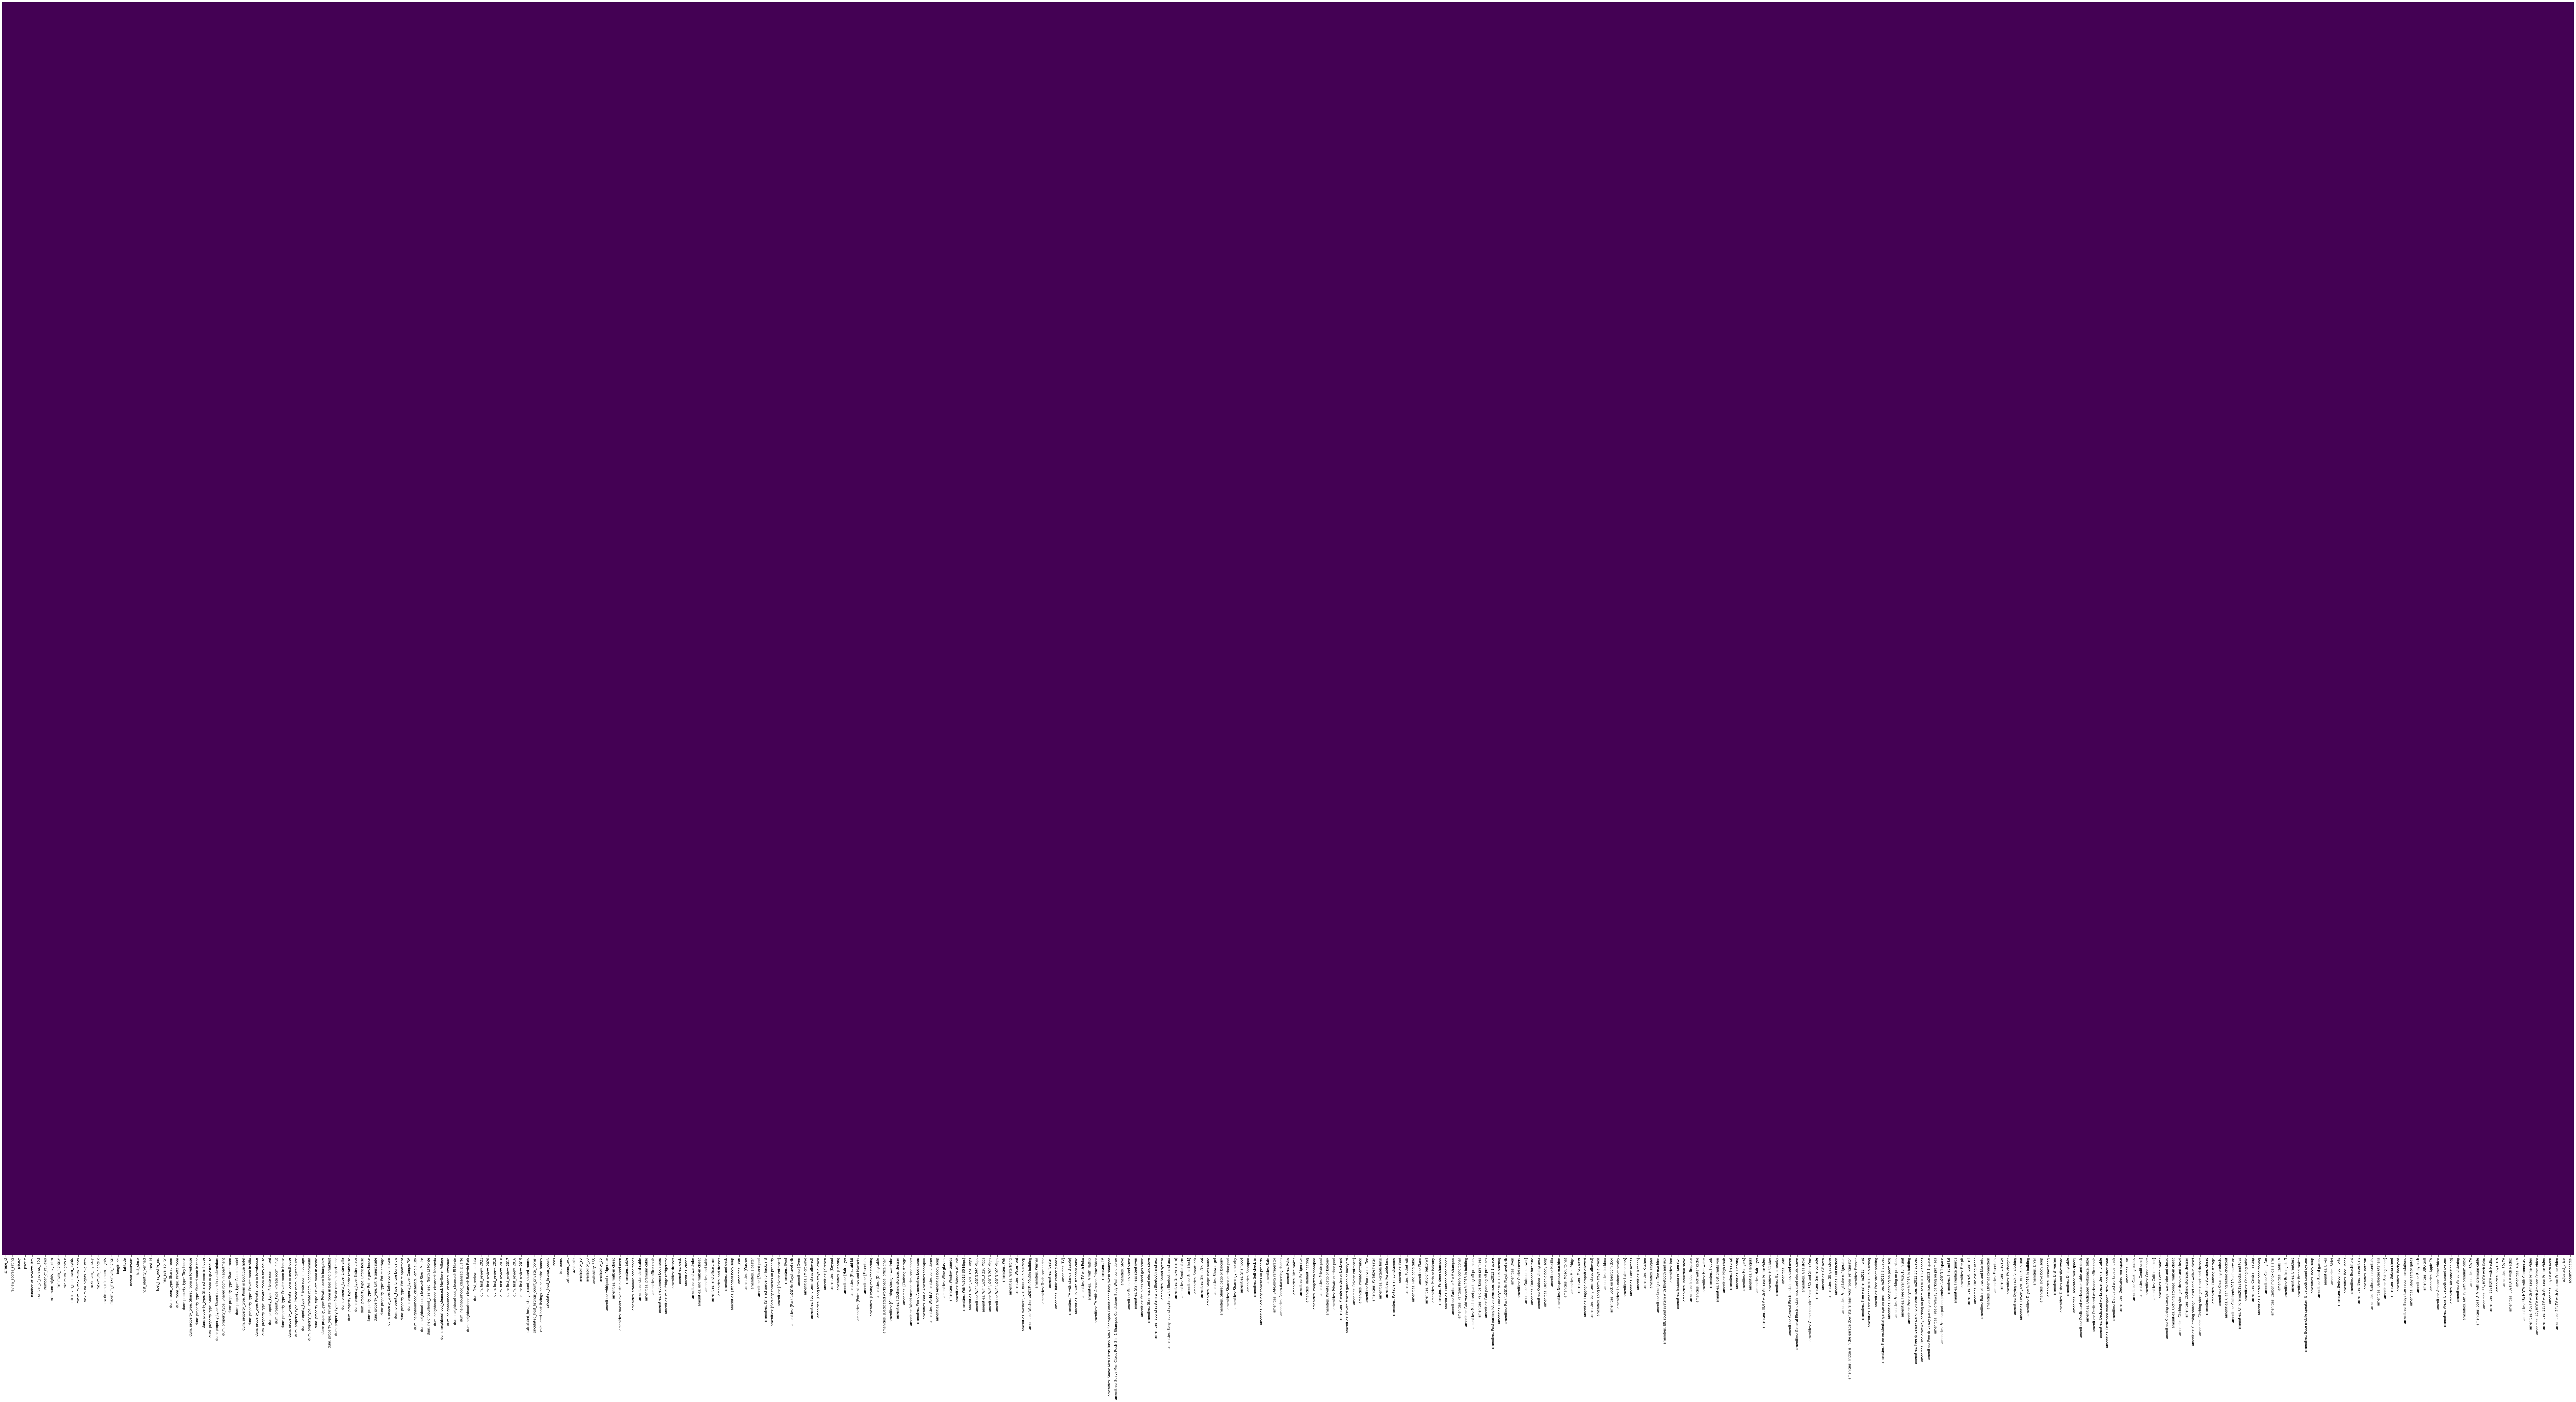

In [87]:
plt.figure(figsize=(140,70))
sns.heatmap(df_d.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [88]:
df_d.isnull().sum(axis = 0).sort_values(ascending = False).head(60)

scrape_id                                                                     0
amenities: Laundromat nearby                                                  0
amenities: HDTV with Amazon Prime Video                                       0
amenities: Hair dryer                                                         0
amenities: Hangers                                                            0
amenities: Hangers]                                                           0
amenities: Heating                                                            0
amenities: Heating]                                                           0
amenities: High chair                                                         0
amenities: Host greets you                                                    0
amenities: Hot tub                                                            0
amenities: Hot water                                                          0
amenities: Hot water kettle             

In [89]:
test.isnull().sum(axis = 0).sort_values(ascending = True).head(60)

scrape_id                                                                     0
amenities: Hangers                                                            0
amenities: Hangers]                                                           0
amenities: Heating                                                            0
amenities: Heating]                                                           0
amenities: High chair                                                         0
amenities: Host greets you                                                    0
amenities: Hot tub                                                            0
amenities: Hot water                                                          0
amenities: Hot water kettle                                                   0
amenities: Hair dryer                                                         0
amenities: Indoor fireplace                                                   0
amenities: Insignia refrigerator        

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,3623288.23,1.666261e+13,4081985.89,49669.612,49682.244,-5.850580e+09,-5.872179e+09


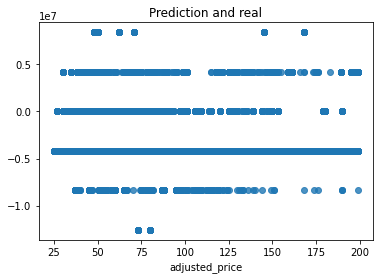

C:\Users\Humberto\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



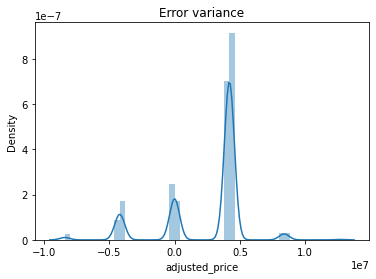

In [90]:
lm = LinearRegression(
        n_jobs = -1,
        normalize = True
)

lm.fit(df_d.drop('adjusted_price', axis = 1), df_d['adjusted_price'])

comment = ''

analysis(
    model = lm, 
    X_train = df_d.drop('adjusted_price', axis = 1), 
    X_test = test.drop('adjusted_price', axis = 1), 
    y_train = df_d['adjusted_price'], 
    y_test = test['adjusted_price']
)

In [ ]:
#plt.figure(figsize=(140,70))
#sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.02,0.22,0.47,0.006,0.004,1.0,1.0


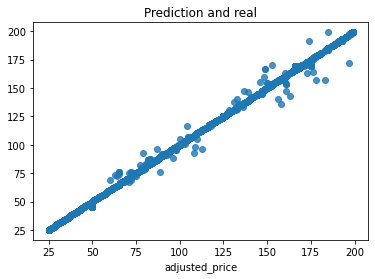

C:\Users\Humberto\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



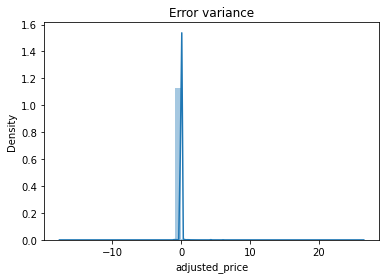

In [91]:
rfm = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700
    
)
rfm.fit(df_d.drop('adjusted_price', axis = 1), df_d['adjusted_price'])

comment = ''

analysis(
    model = rfm, 
    X_train = df_d.drop('adjusted_price', axis = 1), 
    X_test = test.drop('adjusted_price', axis = 1), 
    y_train = df_d['adjusted_price'], 
    y_test = test['adjusted_price']
)

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.14,0.25,0.5,0.006,0.006,1.0,1.0


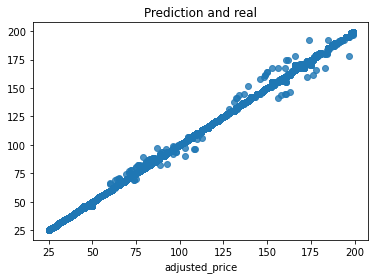

C:\Users\Humberto\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



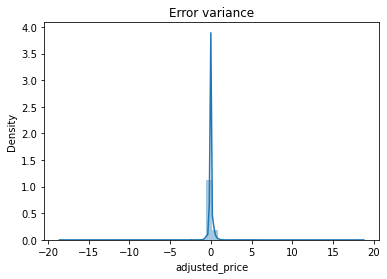

In [92]:
gbr_model = GradientBoostingRegressor(random_state = 101)
gbr_model.fit(df_d.drop('adjusted_price', axis = 1), df_d['adjusted_price'])

comment = ''

analysis(
    model = gbr_model, 
    X_train = df_d.drop('adjusted_price', axis = 1), 
    X_test = test.drop('adjusted_price', axis = 1), 
    y_train = df_d['adjusted_price'], 
    y_test = test['adjusted_price']
)

# Dense neural models

In [93]:
#scaling
scaler = MinMaxScaler()
scaler.fit(df_d.drop('adjusted_price', axis = 1))
X_train_sc = scaler.transform(df_d.drop('adjusted_price', axis = 1).values)
X_test_sc = scaler.transform(test.drop('adjusted_price', axis = 1).values)
y_train = df_d['adjusted_price'].values
y_test = test['adjusted_price'].values

Epoch 1/100
922/922 [==============================] - 2s 2ms/step - loss: 1515.9664 - val_loss: 414.4192
Epoch 2/100
922/922 [==============================] - 1s 2ms/step - loss: 279.3003 - val_loss: 138.3883
Epoch 3/100
922/922 [==============================] - 1s 1ms/step - loss: 113.5325 - val_loss: 44.7627
Epoch 4/100
922/922 [==============================] - 1s 1ms/step - loss: 59.9871 - val_loss: 18.3101
Epoch 5/100
922/922 [==============================] - 1s 1ms/step - loss: 46.2413 - val_loss: 11.7538
Epoch 6/100
922/922 [==============================] - 1s 1ms/step - loss: 40.0984 - val_loss: 9.3731
Epoch 7/100
922/922 [==============================] - 1s 1ms/step - loss: 38.1914 - val_loss: 7.3435
Epoch 8/100
922/922 [==============================] - 1s 1ms/step - loss: 35.8827 - val_loss: 7.0178
Epoch 9/100
922/922 [==============================] - 1s 1ms/step - loss: 34.1434 - val_loss: 5.6504
Epoch 10/100
922/922 [==============================] - 1s 1ms/step - l

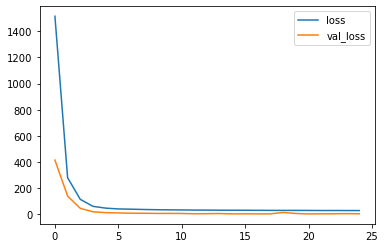

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,1.32,3.01,1.73,0.021,0.021,1.0,1.0


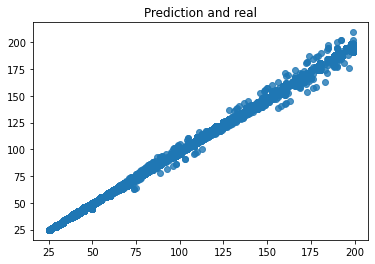

C:\Users\Humberto\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



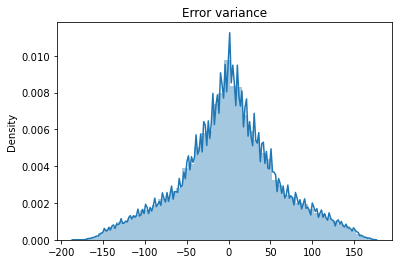

In [94]:
nn_model1 = Sequential()


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)


nn_model1.add(Dense(64, activation = 'relu'))
nn_model1.add(Dropout(0.1))
nn_model1.add(Dense(1))

nn_model1.compile(
    optimizer='rmsprop',
    loss='mse'
)

nn_model1.fit(
    x = X_train_sc,
    y = y_train,
    epochs = 100,
    validation_data=(X_test_sc, y_test), 
    batch_size = 128,
    callbacks=[es]
)


pd.DataFrame(nn_model1.history.history).plot()
plt.show()

analysis(model = nn_model1, 
         X_train = X_train_sc, 
         X_test = X_test_sc, 
         y_train = y_train, 
         y_test = y_test)

# Using text data from 'description' column

In [95]:
df_train['description']

204766    This adorable cottage is located on a treelined street, nestled in Monrovia's premier historical tract. This quiet, family friendly neighborhood exudes the warm welcome and security of a small town and filled with the enchanting beauty of nature and historical architecture. The location is most ideal as it is just a  short 10min walk from enjoying the nature trails of canyon park, and the wonderful dining, cafes, and bars of Old Town Monrovia. This is a perfect getaway for one or two couples.<br /><br /><b>The space</b><br />The cottage is equipped with a sleeping porch that is well lit and includes a couch making it a great space to relax, read, and get some fresh air. The living room is a cozy space appointed by a set of picture windows that surround a large fixed frame window. The day bed pulls out the front underneath and combines to make a king-size bed that will comfortably sleep two. The bedroom and living room are fitted with smart t.v's and a satellite for local news

In [96]:
def del_punct(text):
    chars = [char for char in text if char not in string.punctuation]
    return ''.join(chars)

def del_stopwords(text):
    words = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return words

def text_preparation(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', 'somenumbers', text)
    text = del_stopwords(del_punct(text))
    return text
    
    
text_preparation('Enjoy a beautiful 67 contemporary residence with')

['enjoy', 'beautiful', 'somenumbers', 'contemporary', 'residence']

In [97]:
df_train['description']= df_train['description'].values.astype('U')

<ipython-input-97-5e90e82122ca>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
df_test['description']= df_test['description'].values.astype('U')

<ipython-input-98-128292fcc921>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
bow_transformer = CountVectorizer(analyzer = text_preparation, max_features = 1500).fit(df_train['description'])
bow = bow_transformer.transform(df_train['description'])
bow.shape

(117924, 1500)

In [100]:
tfidf_transformer = TfidfTransformer().fit(bow)
train_tfidf = tfidf_transformer.transform(bow)

bow_test = bow_transformer.transform(df_test['description'])
test_tfidf = tfidf_transformer.transform(bow_test)

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,18.24,684.78,26.17,0.318,0.315,0.61,0.62


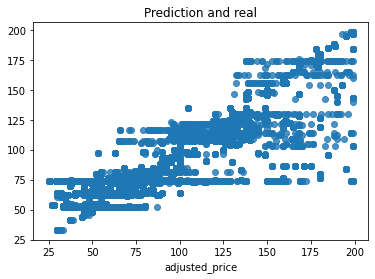

C:\Users\Humberto\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



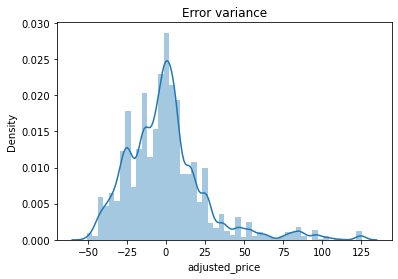

In [101]:
rfm_text = RandomForestRegressor(
    max_depth = 10, 
    n_estimators = 500,
    n_jobs = -1, 
    random_state = 101
)
rfm_text.fit(train_tfidf, df_train['adjusted_price'])

comment = ''

analysis(
    model = rfm_text, 
    X_train = train_tfidf, 
    X_test = test_tfidf, 
    y_train = df_train['adjusted_price'], 
    y_test = df_test['adjusted_price']
)

# We can see that there is not much information in description of object, that can be used for price prediction, but we can try use this in general model. As an experiment we can try to create a model, that would we a stack of 2 models - prediction of text model will be used in model built on all available features as one more feature.

In [102]:
class StackRegression:
    
    def __init__(self, model_general, model_secondary):
        self.model_general = model_general
        self.model_secondary = model_secondary
    
    def fit_predict(self, X_train_general, X_train_secondary, y_train, X_test_general, X_test_secondary, y_test):
        self.model_secondary.fit(X_train_secondary, y_train)
        
        self.secondary_predictions_test =  self.model_secondary.predict(X_test_secondary)
        self.secondary_predictions_train =  self.model_secondary.predict(X_train_secondary)
        
        self.X_train_full = X_train_general.copy()
        self.X_train_full.assign(secondary_model_predictions = self.secondary_predictions_train)
        
        self.X_test_full = X_test_general.copy()
        self.X_test_full.assign(secondary_model_predictions = self.secondary_predictions_test)
                        
        self.model_general.fit(self.X_train_full, y_train)
        
        return self.model_general.predict(self.X_test_full)

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.02,0.22,0.47,0.006,0.004,1.0,1.0


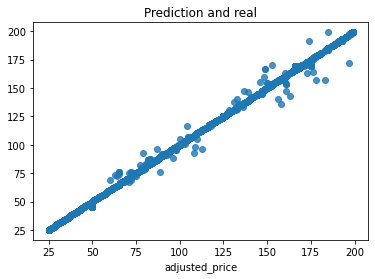

C:\Users\Humberto\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



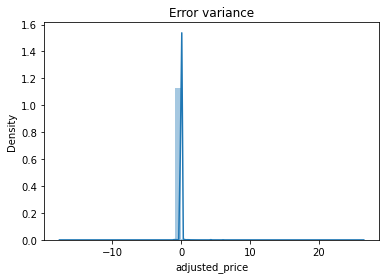

In [103]:
model_general = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700
    
)

model_for_text = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700
    
)

stack_model = StackRegression(model_general, model_for_text)


prediction_test = stack_model.fit_predict(
    X_train_general = df_d.drop('adjusted_price', axis = 1), 
    X_train_secondary = train_tfidf, 
    y_train = df_d['adjusted_price'], 
    X_test_general = test.drop('adjusted_price', axis = 1), 
    X_test_secondary = test_tfidf, 
    y_test = test['adjusted_price']
)

prediction_train = stack_model.fit_predict(
    X_train_general = df_d.drop('adjusted_price', axis = 1), 
    X_train_secondary = train_tfidf, 
    y_train = df_d['adjusted_price'], 
    X_test_general = df_d.drop('adjusted_price', axis = 1), 
    X_test_secondary = train_tfidf, 
    y_test = df_d['adjusted_price']
)

show_metrics(prediction_test, prediction_train, y_test = test['adjusted_price'], y_train = df_d['adjusted_price'])


sns.regplot(x = test['adjusted_price'], y = prediction_test, fit_reg=False)
plt.title('Prediction and real')
plt.show()

sns.distplot(test['adjusted_price'] - prediction_test, bins = 50)
plt.title('Error variance')
plt.show()

# This model doesn't have an advantage over more simple models. So for final submission I prefer to use just simple RFR

# Validation

In [104]:
val_data_for_model = columns_standardization(processing(validation_df))
val_data_for_model

<ipython-input-77-920826ac3d24>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,scrape_id,review_scores_rating,price.y,price.x,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews,minimum_nights_avg_ntm,minimum_nights.y,minimum_nights.x,minimum_minimum_nights,minimum_maximum_nights,maximum_nights_avg_ntm,maximum_nights.y,maximum_nights.x,maximum_minimum_nights,maximum_maximum_nights,longitude,latitude,instant_bookable,host_since,host_identity_verified,host_id,host_has_profile_pic,has_availability,dum: room_type: Shared room,dum: room_type: Private room,dum: property_type: Tiny house,dum: property_type: Shared room in townhouse,dum: property_type: Shared room in tent,dum: property_type: Shared room in house,dum: property_type: Shared room in guesthouse,dum: property_type: Shared room in condominium,dum: property_type: Shared room in apartment,dum: property_type: Shared room,dum: property_type: Room in hotel,dum: property_type: Room in boutique hotel,dum: property_type: Private room in villa,dum: property_type: Private room in townhouse,dum: property_type: Private room in tiny house,dum: property_type: Private room in tent,dum: property_type: Private room in hut,dum: property_type: Private room in house,dum: property_type: Private room in guesthouse,dum: property_type: Private room in guest suite,dum: property_type: Private room in cottage,dum: property_type: Private room in condominium,dum: property_type: Private room in castle,dum: property_type: Private room in bungalow,dum: property_type: Private room in bed and breakfast,dum: property_type: Private room in apartment,dum: property_type: Entire villa,dum: property_type: Entire townhouse,dum: property_type: Entire place,dum: property_type: Entire house,dum: property_type: Entire guesthouse,dum: property_type: Entire guest suite,dum: property_type: Entire cottage,dum: property_type: Entire condominium,dum: property_type: Entire bungalow,dum: property_type: Entire apartment,dum: property_type: Camper/RV,dum: neighbourhood_cleansed: Temple City,dum: neighbourhood_cleansed: Sierra Madre,dum: neighbourhood_cleansed: North El Monte,dum: neighbourhood_cleansed: Monrovia,dum: neighbourhood_cleansed: Mayflower Village,dum: neighbourhood_cleansed: Irwindale,dum: neighbourhood_cleansed: El Monte,dum: neighbourhood_cleansed: Duarte,dum: neighbourhood_cleansed: Baldwin Park,dum: first_review: no data,dum: first_review: 2021,dum: first_review: 2020,dum: first_review: 2019,dum: first_review: 2018,dum: first_review: 2017,dum: first_review: 2016,dum: first_review: 2015,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_private_rooms,calculated_host_listings_count_entire_homes,calculated_host_listings_count,beds,bedrooms,bathrooms_text,available,availability_90,availability_60,availability_365,availability_30,amenities: whirlpool refrigerator,amenities: walk-in closet,amenities: toaster oven stainless steel oven,amenities: table,amenities: standard conditioner,amenities: standard cable,amenities: premium cable,amenities: office chair,amenities: neutrogena body soap,amenities: mini fridge refrigerator,amenities: dresser,amenities: desk,amenities: closet,amenities: and wardrobe,amenities: and walk-in closet,amenities: and table,amenities: and office chair,amenities: and dresser,amenities: and desk,amenities: [standard body soap,amenities: [Wifi,amenities: [Washer,amenities: [Toaster,amenities: [Shared pool,amenities: [Shared garden or backyard,amenities: [Security cameras on property,amenities: [Private entrance],amenities: [Pool,amenities: [Pack \u2019n Play/travel crib,amenities: [Oven,amenities: [Microwave,amenities: [Long term stays allowed],amenities: [Long term stays allowed,amenities: [Kitchen,amenities: [Keypad,amenities: [Heating,amenities: [Hair dryer,amenities: [First aid kit,amenities: [Extra pillows and blankets,amenities: [Essentials,amenities: [Drying rack for clothing,amenities: [Dining table,amenities: [Dedicated workspace: office chair,amenities: [Clothing storage: wardrobe,amenities: [Clothing storage: dresser,amenities: 

In [105]:
val_data_for_model[val_data_for_model.isnull().any(axis=1)]

,scrape_id,review_scores_rating,price.y,price.x,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews,minimum_nights_avg_ntm,minimum_nights.y,minimum_nights.x,minimum_minimum_nights,minimum_maximum_nights,maximum_nights_avg_ntm,maximum_nights.y,maximum_nights.x,maximum_minimum_nights,maximum_maximum_nights,longitude,latitude,instant_bookable,host_since,host_identity_verified,host_id,host_has_profile_pic,has_availability,dum: room_type: Shared room,dum: room_type: Private room,dum: property_type: Tiny house,dum: property_type: Shared room in townhouse,dum: property_type: Shared room in tent,dum: property_type: Shared room in house,dum: property_type: Shared room in guesthouse,dum: property_type: Shared room in condominium,dum: property_type: Shared room in apartment,dum: property_type: Shared room,dum: property_type: Room in hotel,dum: property_type: Room in boutique hotel,dum: property_type: Private room in villa,dum: property_type: Private room in townhouse,dum: property_type: Private room in tiny house,dum: property_type: Private room in tent,dum: property_type: Private room in hut,dum: property_type: Private room in house,dum: property_type: Private room in guesthouse,dum: property_type: Private room in guest suite,dum: property_type: Private room in cottage,dum: property_type: Private room in condominium,dum: property_type: Private room in castle,dum: property_type: Private room in bungalow,dum: property_type: Private room in bed and breakfast,dum: property_type: Private room in apartment,dum: property_type: Entire villa,dum: property_type: Entire townhouse,dum: property_type: Entire place,dum: property_type: Entire house,dum: property_type: Entire guesthouse,dum: property_type: Entire guest suite,dum: property_type: Entire cottage,dum: property_type: Entire condominium,dum: property_type: Entire bungalow,dum: property_type: Entire apartment,dum: property_type: Camper/RV,dum: neighbourhood_cleansed: Temple City,dum: neighbourhood_cleansed: Sierra Madre,dum: neighbourhood_cleansed: North El Monte,dum: neighbourhood_cleansed: Monrovia,dum: neighbourhood_cleansed: Mayflower Village,dum: neighbourhood_cleansed: Irwindale,dum: neighbourhood_cleansed: El Monte,dum: neighbourhood_cleansed: Duarte,dum: neighbourhood_cleansed: Baldwin Park,dum: first_review: no data,dum: first_review: 2021,dum: first_review: 2020,dum: first_review: 2019,dum: first_review: 2018,dum: first_review: 2017,dum: first_review: 2016,dum: first_review: 2015,calculated_host_listings_count_shared_rooms,calculated_host_listings_count_private_rooms,calculated_host_listings_count_entire_homes,calculated_host_listings_count,beds,bedrooms,bathrooms_text,available,availability_90,availability_60,availability_365,availability_30,amenities: whirlpool refrigerator,amenities: walk-in closet,amenities: toaster oven stainless steel oven,amenities: table,amenities: standard conditioner,amenities: standard cable,amenities: premium cable,amenities: office chair,amenities: neutrogena body soap,amenities: mini fridge refrigerator,amenities: dresser,amenities: desk,amenities: closet,amenities: and wardrobe,amenities: and walk-in closet,amenities: and table,amenities: and office chair,amenities: and dresser,amenities: and desk,amenities: [standard body soap,amenities: [Wifi,amenities: [Washer,amenities: [Toaster,amenities: [Shared pool,amenities: [Shared garden or backyard,amenities: [Security cameras on property,amenities: [Private entrance],amenities: [Pool,amenities: [Pack \u2019n Play/travel crib,amenities: [Oven,amenities: [Microwave,amenities: [Long term stays allowed],amenities: [Long term stays allowed,amenities: [Kitchen,amenities: [Keypad,amenities: [Heating,amenities: [Hair dryer,amenities: [First aid kit,amenities: [Extra pillows and blankets,amenities: [Essentials,amenities: [Drying rack for clothing,amenities: [Dining table,amenities: [Dedicated workspace: office chair,amenities: [Clothing storage: wardrobe,amenities: [Clothing storage: dresser,amenities: 

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.02,0.19,0.43,0.005,0.004,1.0,1.0


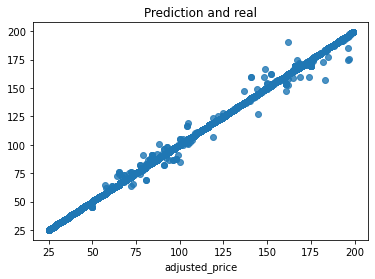

C:\Users\Humberto\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



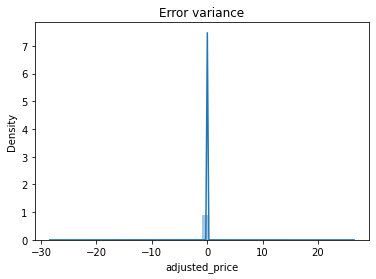

In [106]:
analysis(
    model = rfm, 
    X_train = df_d.drop('adjusted_price', axis = 1), 
    X_test = val_data_for_model.drop('adjusted_price', axis = 1), 
    y_train = df_d['adjusted_price'], 
    y_test = val_data_for_model['adjusted_price']
)